## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

Nombres:


### Introducción
Una *start-up* agrícola quiere construir una aplicación online que conecte el campo
con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposición de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes finales en la ciudad.

Para optimizar la gestión logística y desarrollar esta labor de manera eficiente, los dueños de la *start-up* han visto la necesidad de diseñar e implementar un sistema de gestión y predicción que les permita planear con la debida anticipación la demanda esperada. Así podrán coordinar las actividades de producción, junto con los agricultores, y atender la demanda mientras se minimizan las pérdidas por unidades de producto no vendido o estropeado. 

Este es un reto altamente relevante para la sostenibilidad de la industria alimentaria, donde gran cantidad de las pérdidas se refieren a grupos alimenticios donde la frescura del producto es un importante criterio para el consumo. El desperdicio de los alimentos se relaciona con el sobre-pedido o el sobre-almacenamiento, lo cual puede a su vez ser consecuencia de dificultades en el pronóstico de la demanda. Este problema es aun más marcado a medida que uno sube en la cadena de producción y se aleja de los patrones de comportamiento del consumidor final. 

Por lo tanto, la start-up agrícola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar modelos de predicción de demanda que apoyen su operación, logrando la disponibilidad de los productos para atender a los clientes del día siguiente, minimizando los desperdicios de alimentos e identificando hábitos de consumo que le permita optimizar sus operaciones logísticas y de negocio.

### Enunciado
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un modelo predictivo de demanda para los productos más relevantes con los que trabaja la start-up agrícola, obteniendo una predicción a nivel semanal (una semana adelante). Los datos los encuentra en el archivo DatosAgro.txt, donde se tiene la identificación del cliente, la fecha en que realizó el pedido, la magnitud del pedido (en unidades según lo especificado en el nombre del producto), su precio, y el código del producto agrícola que consta en el pedido.

## 1. Visualicemos los datos

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import datetime

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('precision', 5)

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from fbprophet import Prophet




from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import RandomNormal

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten

from sklearn.metrics import mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
# Importemos los datos y visualizemos la serie de tiempo
data = pd.read_csv("DatosAgro.txt", delimiter='\t', encoding="utf8")
data = data.drop('Unnamed: 6', 1)
data.head(100)

Cliente       Fecha  Pedido  Precio Producto  \
0   Cliente26  18/09/2017      20     700  VER0049   
1   Cliente26  18/09/2017      10    1200  FRU0024   
2   Cliente26  18/09/2017       4    1600  VER0041   
3   Cliente26  18/09/2017      10    1500  VER0038   
4   Cliente26  18/09/2017       8    1100  VER0010   
5   Cliente26  18/09/2017      30    1000  VER0052   
6   Cliente26  18/09/2017      24    1000  TUB0012   
7    Cliente3  18/09/2017       1    4500  VER0050   
8    Cliente3  18/09/2017       1    3500  VER0043   
9    Cliente3  18/09/2017       2    1500  VER0038   
10   Cliente3  18/09/2017       2    1400  VER0028   
11   Cliente3  18/09/2017       1    1400  VER0020   
12   Cliente3  18/09/2017       2     500  VER0017   
13   Cliente3  18/09/2017       3    7000  VER0016   
14   Cliente3  18/09/2017       1    1600  VER0013   
15   Cliente3  18/09/2017       5    1200  VER0007   
16   Cliente3  18/09/2017       4    1000  TUB0012   
17   Cliente3  18/09/2017       3    1400  TUB0010   
18   Cliente3  18/09/2017       1    1900  TUB0009   
19   Cliente3  18/09/2017       5     700  TUB0006   
20   Cliente3  18/09/2017       2    1300  TUB0005   
21   Cliente3  18/09/2017       3    3000  GRA0006   
22   Cliente3  18/09/2017       5    1300  FRU0046   
23   Cliente3  18/09/2017       2    4000  FRU0045   
24   Cliente3  18/09/2017       1    4200  FRU0039   
25   Cliente3  18/09/2017       2    1200  FRU0024   
26   Cliente3  18/09/2017       3    1100  FRU0008   
27   Cliente3  18/09/2017       3    2000  FRU0003   
28  Cliente21  18/09/2017       4    1500  VER0038   
29  Cliente21  18/09/2017      16    1000  VER0052   
30  Cliente21  18/09/2017       4    7000  VER0016   
31  Cliente21  18/09/2017       4    1900  VER0009   
32  Cliente21  18/09/2017       8    1600  VER0013   
33  Cliente21  18/09/2017       1    1100  VER0005   
34  Cliente21  18/09/2017       4     700  TUB0006   
35  Cliente21  18/09/2017       2    1400  FRU0048   
36  Cliente21  18/09/2017      16    1300  FRU0046   
37  Cliente21  18/09/2017       1    2100  FRU0033   
38  Cliente21  18/09/2017       6    1300  FRU0030   
39  Cliente21  18/09/2017       3    1200  FRU0024   
40  Cliente21  18/09/2017       2    2300  FRU0054   
41  Cliente21  18/09/2017       2    3000  FRU0057   
42  Cliente21  18/09/2017      16    1100  FRU0008   
43  Cliente21  18/09/2017       2    2000  FRU0003   
44  Cliente27  18/09/2017      50     700  VER0006   
45  Cliente29  17/09/2017       1     900  VER0035   
46  Cliente29  17/09/2017       1    1500  FRU0016   
47  Cliente29  17/09/2017       1    3500  FRU0042   
48  Cliente29  17/09/2017       2    1200  FRU0024   
49  Cliente29  17/09/2017       3    7000  VER0016   
50  Cliente29  17/09/2017       9    1300  FRU0046   
51  Cliente29  17/09/2017       8    1400  VER0028   
52  Cliente26  17/09/2017       4    1600  VER0041   
53  Cliente26  17/09/2017      24    1500  VER0038   
54  Cliente26  17/09/2017       6    1100  VER0010   
55  Cliente26  17/09/2017     100    1000  VER0052   
56  Cliente26  17/09/2017       8    1400  FRU0048   
57  Cliente26  17/09/2017      22    1000  TUB0012   
58  Cliente26  17/09/2017      50    1200  VER0012   
59  Cliente29  16/09/2017       1    2100  FRU0033   
60  Cliente29  16/09/2017       1    3500  FRU0042   
61  Cliente29  16/09/2017       2    1200  VER0012   
62  Cliente29  16/09/2017       8    1300  FRU0046   
63  Cliente29  16/09/2017       4    7000  VER0016   
64  Cliente29  16/09/2017       8    1400  VER0028   
65   Cliente3  16/09/2017       2    3500  VER0043   
66   Cliente3  16/09/2017       2    1500  VER0038   
67   Cliente3  16/09/2017       2     800  VER0037   
68   Cliente3  16/09/2017       3     900  VER0035   
69   Cliente3  16/09/2017       3    1400  VER0028   
70   Cliente3  16/09/2017       2    1400  VER0020   
71   Cliente3  16/09/2017       4    7000  VER0016   
72   Cliente3  16/09/2017       5    1600  VER0013   
73   Clien

Veamos los clientes con mayor participación en la demanda:

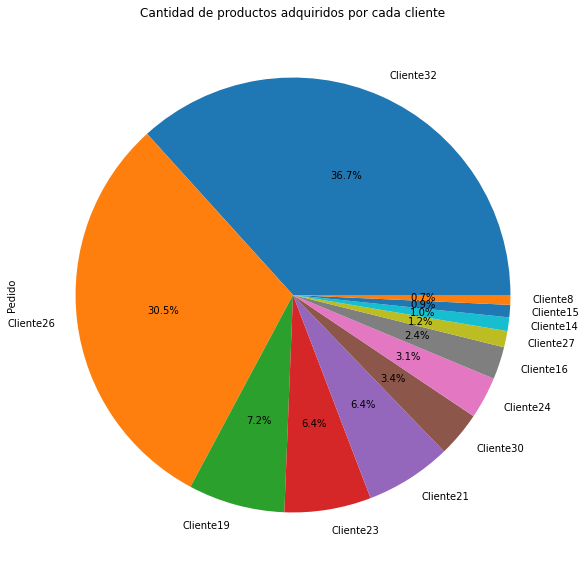

In [3]:
cliente = pd.DataFrame(data[data['Pedido'] > 10].groupby(data["Cliente"]).sum())
cliente2 = cliente[cliente['Pedido']>50]
cliente3 = cliente2.sort_values("Pedido", ascending= False)
cliente3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%')
plt.title("Cantidad de productos adquiridos por cada cliente")
plt.show()


Vemaos los productos con más volumen de pedido:

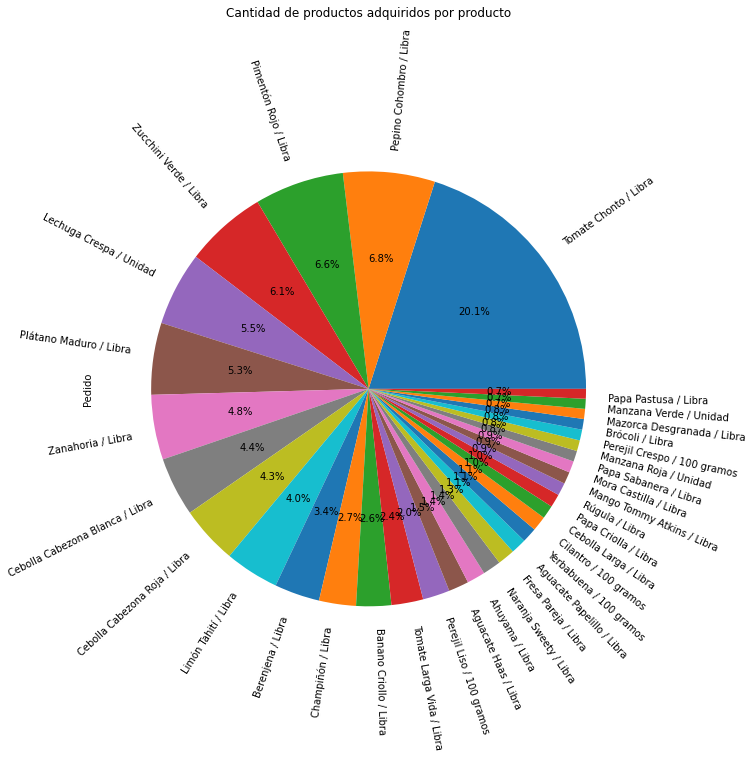

In [4]:
productos = pd.DataFrame(data["Pedido"].groupby(data["Nombre_producto"]).sum())
productos2 = productos[productos['Pedido']>140]
productos3 = productos2.sort_values("Pedido", ascending= False)
productos3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

A continuación implemente la metodología propuesta para construir su modelo:

In [5]:
productos = pd.DataFrame(data.groupby(["Nombre_producto","Fecha"])['Pedido'].sum()).reset_index().reset_index(col_level=1)

In [6]:
productos

index                  Nombre_producto       Fecha  Pedido
0         0                   Acelga / Libra  01/12/2016       1
1         1                   Acelga / Libra  07/02/2017       3
2         2                   Acelga / Libra  08/03/2017       1
3         3                   Acelga / Libra  13/02/2017       6
4         4                   Acelga / Libra  17/01/2017       2
5         5                   Acelga / Libra  19/01/2017       1
6         6                   Acelga / Libra  23/03/2017       2
7         7                   Acelga / Libra  23/11/2016      10
8         8                    Agraz / Libra  04/07/2017       1
9         9                    Agraz / Libra  06/07/2017       2
10       10                    Agraz / Libra  13/02/2017       1
11       11                    Agraz / Libra  13/12/2016       1
12       12                    Agraz / Libra  16/08/2017       2
13       13                    Agraz / Libra  17/06/2017       1
14       14                    Agraz / Libra  18/11/2016      10
15       15                    Agraz / Libra  23/11/2016       2
16       16                    Agraz / Libra  24/03/2017       1
17       17                    Agraz / Libra  29/05/2017       1
18       18            Aguacate Haas / Libra  01/07/2017       3
19       19            Aguacate Haas / Libra  03/04/2017       2
20       20            Aguacate Haas / Libra  05/08/2017       2
21       21            Aguacate Haas / Libra  05/12/2016      11
22       22            Aguacate Haas / Libra  07/02/2017       1
23       23            Aguacate Haas / Libra  08/02/2017       2
24       24            Aguacate Haas / Libra  08/03/2017       1
25       25            Aguacate Haas / Libra  08/07/2017       1
26       26            Aguacate Haas / Libra  11/08/2017      14
27       27            Aguacate Haas / Libra  13/12/2016       2
28       28            Aguacate Haas / Libra  14/07/2017       1
29       29            Aguacate Haas / Libra  15/03/2017       3
30       30            Aguacate Haas / Libra  15/06/2017       1
31       31            Aguacate Haas / Libra  15/09/2017      10
32       32            Aguacate Haas / Libra  16/02/2017       2
33       33            Aguacate Haas / Libra  17/11/2016       5
34       34            Aguacate Haas / Libra  18/07/2017       1
35       35            Aguacate Haas / Libra  18/11/2016     113
36       36            Aguacate Haas / Libra  19/01/2017       2
37       37            Aguacate Haas / Libra  19/08/2017       4
38       38            Aguacate Haas / Libra  23/03/2017       2
39       39            Aguacate Haas / Libra  23/11/2016       3
40       40            Aguacate Haas / Libra  24/03/2017       1
41       41            Aguacate Haas / Libra  26/11/2016       2
42       42            Aguacate Haas / Libra  28/07/2017       2
43       43            Aguacate Haas / Libra  28/08/2017     100
44       44            Aguacate Haas / Libra  29/05/2017       1
45       45            Aguacate Haas / Libra  29/07/2017       8
46       46       Aguacate Papelillo / Libra  01/03/2017       6
47       47       Aguacate Papelillo / Libra  02/09/2017       3
48       48       Aguacate Papelillo / Libra  02/12/2016       5
49       49       Aguacate Papelillo / Libra  03/07/2017       4
50       50       Aguacate Papelillo / Libra  03/08/2017       4
51       51       Aguacate Papelillo / Libra  04/07/2017       2
52       52       Aguacate Papelillo / Libra  04/09/2017       5
53       53       Aguacate Papelillo / Libra  06/12/2016       1
54       54       Aguacate Papelillo / Libra  07/02/2017       5
55       55       Aguacate Papelillo / Libra  07/06/2017       1
56       56       Aguacate Papelillo / Libra  07/08/2017       6
57       57       Aguacate Papelillo / Libra  08/08/2017       5
58       58       Aguacate Papelillo / Libra  09/08/2017       4
59       59       Aguacate Papelillo / Libra  09/09/2017       3
60       60       Aguacate Papelillo / Li

Para poder manejar las series de manera independiente se deberán tratar por columnas y no agrupadas por filas como trae la data original.

In [ ]:
df=productos.pivot(index='Fecha', columns='Nombre_producto', values='Pedido').reset_index().sort_values(by=['Fecha'])

In [8]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format= '%d/%m/%Y')
df=df.sort_values(by=['Fecha']).set_index("Fecha")

In [9]:
df_00=df.resample('W-Sun').sum().reset_index().replace(0,np.nan)
df_00

Nombre_producto      Fecha  Acelga / Libra  Agraz / Libra  \
0               2016-11-06             NaN            NaN   
1               2016-11-13             NaN            NaN   
2               2016-11-20             NaN           10.0   
3               2016-11-27            10.0            2.0   
4               2016-12-04             1.0            NaN   
5               2016-12-11             NaN            NaN   
6               2016-12-18             NaN            1.0   
7               2016-12-25             NaN            NaN   
8               2017-01-01             NaN            NaN   
9               2017-01-08             NaN            NaN   
10              2017-01-15             NaN            NaN   
11              2017-01-22             3.0            NaN   
12              2017-01-29             NaN            NaN   
13              2017-02-05             NaN            NaN   
14              2017-02-12             3.0            NaN   
15              2017-02-19             6.0            1.0   
16              2017-02-26             NaN            NaN   
17              2017-03-05             NaN            NaN   
18              2017-03-12             1.0            NaN   
19              2017-03-19             NaN            NaN   
20              2017-03-26             2.0            1.0   
21              2017-04-02             NaN            NaN   
22              2017-04-09             NaN            NaN   
23              2017-04-16             NaN            NaN   
24              2017-04-23             NaN            NaN   
25              2017-04-30             NaN            NaN   
26              2017-05-07             NaN            NaN   
27              2017-05-14             NaN            NaN   
28              2017-05-21             NaN            NaN   
29              2017-05-28             NaN            NaN   
30              2017-06-04             NaN            1.0   
31              2017-06-11             NaN            NaN   
32              2017-06-18             NaN            1.0   
33              2017-06-25             NaN            NaN   
34              2017-07-02             NaN            NaN   
35              2017-07-09             NaN            3.0   
36              2017-07-16             NaN            NaN   
37              2017-07-23             NaN            NaN   
38              2017-07-30             NaN            NaN   
39              2017-08-06             NaN            NaN   
40              2017-08-13             NaN            NaN   
41              2017-08-20             NaN            2.0   
42              2017-08-27             NaN            NaN   
43              2017-09-03             NaN            NaN   
44              2017-09-10             NaN            NaN   
45              2017-09-17             NaN            NaN   
46              2017-09-24             NaN            NaN   

Nombre_producto  Aguacate Haas / Libra  Aguacate Papelillo / Libra  \
0                                  NaN                         NaN   
1                                  NaN                         NaN   
2                                118.0                         NaN   
3                                  5.0                        11.0   
4                                  NaN                        18.0   
5                                 11.0                         6.0   
6                                  2.0                         3.0   
7                                  NaN                         NaN   
8                                  NaN                         NaN   
9                                  NaN                         NaN   
10                                 NaN                         3.0   
11                                 2.0                        25.0   
12                                 NaN                        17.0   
13                                 NaN                         NaN   
14                   

A continuación se seleccionan las series que tienen a lo más 30% de datos faltantes en su historia

In [10]:
columns=list(df_00.isnull().sum()/df_00.shape[0]<=0.3)

In [11]:
df_01=df_00.iloc[2:,columns].set_index(["Fecha"])

In [12]:
df_01

Nombre_producto  Banano Criollo / Libra  Cebolla Cabezona Roja / Libra  \
Fecha                                                                    
2016-11-20                          5.0                            5.0   
2016-11-27                         53.0                           29.0   
2016-12-04                         12.0                           21.0   
2016-12-11                          3.0                           22.0   
2016-12-18                          2.0                           36.0   
2016-12-25                          NaN                           18.0   
2017-01-01                          NaN                           23.0   
2017-01-08                          1.0                           12.0   
2017-01-15                          2.0                           28.0   
2017-01-22                          6.0                            9.0   
2017-01-29                          8.0                           28.0   
2017-02-05                          1.0                           19.0   
2017-02-12                          8.0                           23.0   
2017-02-19                          6.0                           24.0   
2017-02-26                          8.0                            4.0   
2017-03-05                          5.0                           31.0   
2017-03-12                          6.0                            6.0   
2017-03-19                         10.0                           14.0   
2017-03-26                          3.0                           14.0   
2017-04-02                          NaN                           11.0   
2017-04-09                          4.0                            8.0   
2017-04-16                          NaN                           50.0   
2017-04-23                          NaN                            NaN   
2017-04-30                          NaN                            NaN   
2017-05-07                          NaN                            NaN   
2017-05-14                          NaN                            NaN   
2017-05-21                          1.0                            NaN   
2017-05-28                          1.0                            NaN   
2017-06-04                          2.0                            2.0   
2017-06-11                          2.0                            NaN   
2017-06-18                          3.0                            NaN   
2017-06-25                          1.0                            NaN   
2017-07-02                         23.0                           33.0   
2017-07-09                         63.0                           25.0   
2017-07-16                         37.0                           36.0   
2017-07-23                         25.0                           46.0   
2017-07-30                         21.0                           19.0   
2017-08-06                         30.0                           47.0   
2017-08-13                         23.0                           47.0   
2017-08-20                         34.0                           61.0   
2017-08-27                         36.0                           24.0   
2017-09-03                         16.0                           28.0   
2017-09-10                         12.0                           21.0   
2017-09-17                         26.0                           25.0   
2017-09-24                         19.0                            9.0   

Nombre_producto  Cebolla Larga / Libra  Champiñón / Libra  \
Fecha                                                       
2016-11-20                         NaN                2.0   
2016-11-27                         3.0                7.0   
2016-12-04                         8.0                5.0   
2016-12-11                         4.0                2.0   
2016-12-18                         6.0                2.0   
2016-12-25                         1.0                NaN   
2017-01-01                       

Posteriormente se decide interpolar las series con el método "time" que para este caso en particular y como las observaciones son equidistantes en el tiempo, el método es el mismo a una interpolación lineal

In [13]:
df_01.interpolate(method='time', inplace=True)

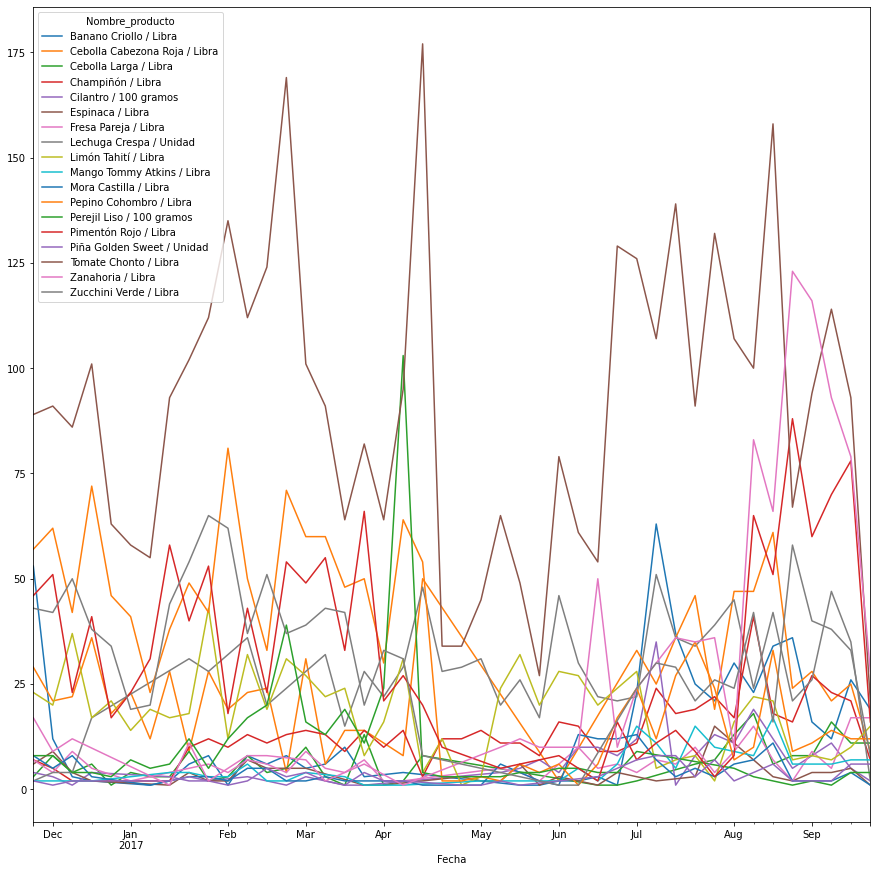

In [14]:
df_02=df_01.iloc[1:,:]
df_02.plot(figsize=(15,15))

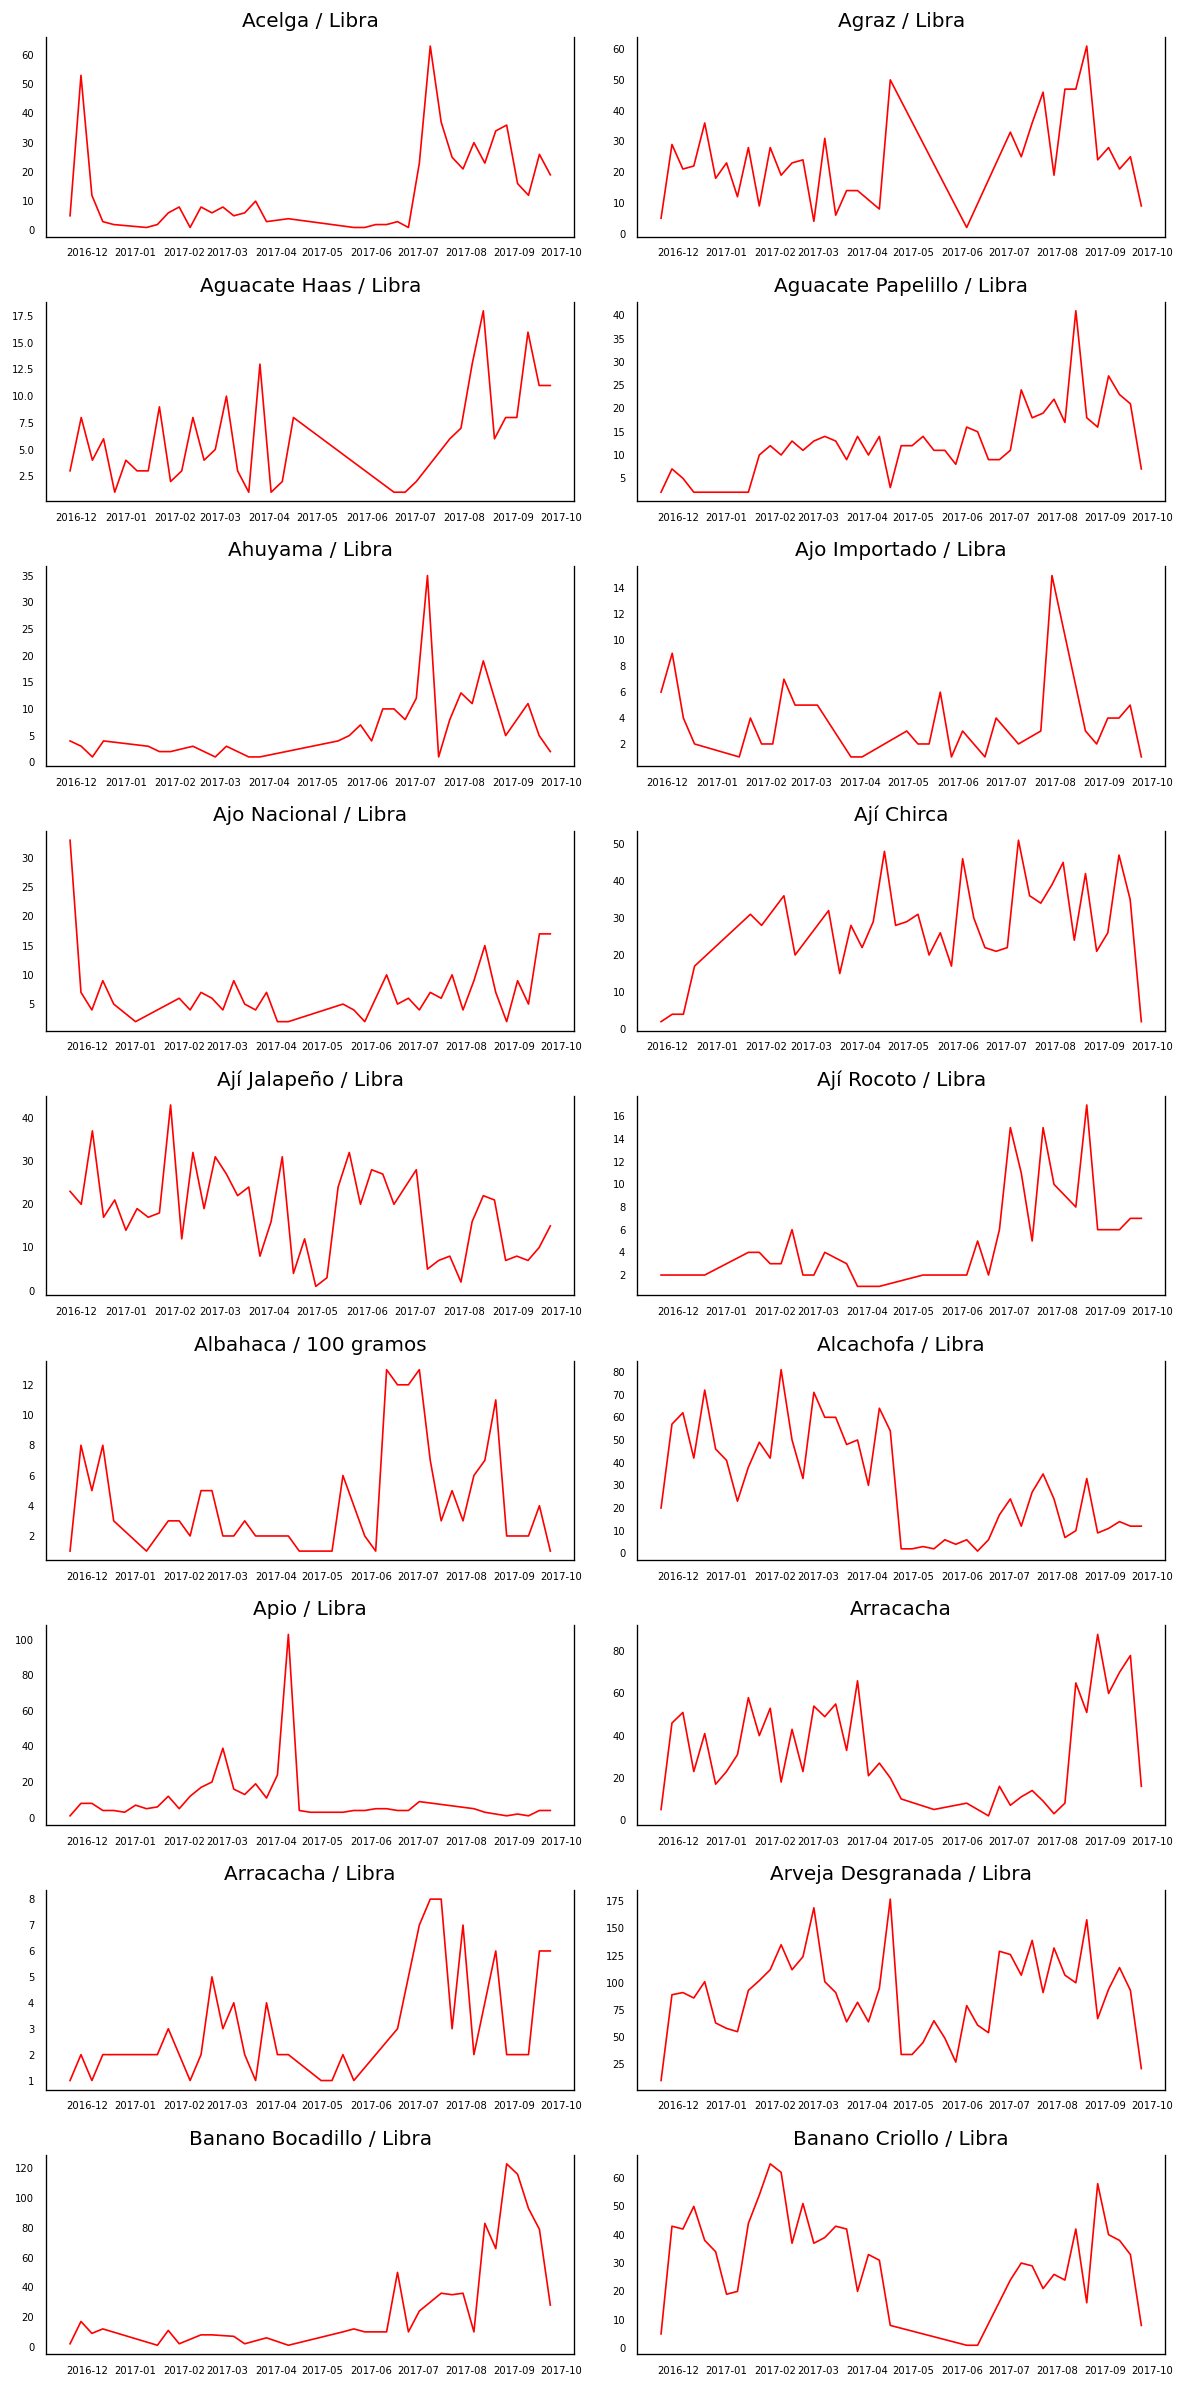

In [15]:
fig, axes = plt.subplots(nrows=9, ncols=2, dpi=120, figsize=(10,20))
for i, ax in enumerate(axes.flatten()):
    data = df_01[df_01.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [16]:
from pmdarima.arima import auto_arima

La cantidad de observaciones para ajustar los modelos finalmente será:

In [17]:
n=df_02.shape[0]
n

44

## MODELOS PROPUESTOS

Como se plantea en el documento final, se evaluarán 4 tipos de modelos diferentes, tres de ellos son univariados y el último es un modelamiento multivariado haciendo uso de estructuras de correlación más complejas.

### ARIMA

In [259]:
def rolling_forecast(df): 
    Producto=[]
    RMSE=[]
    Predicciones_series=pd.DataFrame()
    
    for i in range(df.shape[1]):
        
        predictions = list()
        train, test = pd.DataFrame(df_02.iloc[:n-8,i]), pd.DataFrame(df_02.iloc[n-8:,i])
        history = train.copy()
    
        for t in range(len(test)):
            m = auto_arima(history, error_action='ignore', seasonal=True, m=4)
            output = m.predict(1)
            yhat = output[0]
            predictions.append(yhat)
            obs = pd.DataFrame(test.iloc[t]).transpose()
            history = pd.concat([history, obs],axis=0)
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({i:predictions})],axis=1)
        error = mean_squared_error(test, predictions)**0.5
        
        Producto.append(i)
        RMSE.append(error)
    
    return Producto, RMSE, Predicciones_series


In [260]:
Producto, RMSE, Predicciones_Arima = rolling_forecast(df_02)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Ma

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Ma

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\mod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sari

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\sta

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarni

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:56

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Prog

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramete

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\ProgramData\Anaconda3\lib\site-packag

Los RMSE de los rollingback para la muestra de test estimando este modelo será:

In [261]:
ARIMA = pd.DataFrame({'Producto':Producto,'RMSE_ARIMA':RMSE})
ARIMA

Producto  RMSE_ARIMA
0          0    15.08612
1          1    19.09936
2          2     7.27954
3          3    11.57016
4          4    10.35585
5          5     2.54197
6          6     6.63593
7          7    17.17071
8          8     7.95062
9          9     5.04265
10        10     3.43769
11        11    11.38243
12        12     8.16302
13        13    33.29101
14        14     2.28288
15        15    39.56662
16        16    50.22636
17        17    20.88680

In [262]:
Predicciones_Arima

0         1        2         3         4        5        6   \
0  61.56562  21.07649  4.50000  24.29433  36.40625  7.92981  5.04167   
1  27.67993  16.66710  5.16796  18.58184  11.15045  4.18736  5.14865   
2  16.60976  36.35098  9.04567  28.97219  13.96786  5.13897  8.33313   
3  29.14887  44.70038  3.93358  24.03447  13.80830 -1.98924  5.85664   
4  31.30863  35.27021  2.89810  20.77162  10.89705  2.82568  4.49092   
5  15.47103  25.40301  5.87554  23.64194  10.19843  3.81468  5.45122   
6  13.21997  24.45545  5.54208  23.95763  10.39409  3.81915  5.44048   
7  25.58392  23.74960  9.30054  23.80100   7.59162  4.32548  8.70798   

         7         8         9        10        11        12        13  \
0  38.29791  20.71327   9.75758  3.45466  26.09493  11.52778   5.69887   
1  41.69120  20.03699  12.37237  5.42436  16.26579  11.35135   2.36981   
2  33.66989  22.26774   8.98329  6.11494  12.93691  11.13158  29.46941   
3  38.97826  18.96028  15.71674  8.97652  23.11112  10.89744  64.80854   
4  31.16571  19.05000   8.97945  3.02337  16.16410  10.65000  59.15539   
5  29.17767  18.78049   8.42506  2.98883  13.62911  10.43902  72.79053   
6  37.38577  18.50000   9.85917  2.95659  13.81288  10.21429  46.52000   
7  37.47040  16.35734   5.54418  4.15136  12.92642  10.06977  70.19959   

        14         15         16        17  
0  4.93847  106.59494   35.14144  26.00000  
1  4.01773   96.95226   24.56867  24.00000  
2  2.91769   94.33210   28.27536  42.00000  
3  3.53466  119.20361   27.83043  16.00000  
4  4.33261   82.95478  103.29864  41.07709  
5  1.27539   92.42854  144.69962  43.67863  
6  2.77025   99.62869  104.00000  37.18990  
7  3.80812   92.44651   74.85740  33.90569

### Prophet

In [23]:
data_pf = pd.DataFrame({'ds': df_02.index[:], 'y': df_02.iloc[:,0]})
data_pf.head()

ds         y
Fecha                          
2016-11-27 2016-11-27  53.00000
2016-12-04 2016-12-04  12.00000
2016-12-11 2016-12-11   3.00000
2016-12-18 2016-12-18   2.00000
2016-12-25 2016-12-25   1.66667

In [24]:
X = data_pf.y
Y = data_pf.ds
size = int(len(X) * 0.8)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

In [131]:
def rolling_forecast_prophet(df): 
    Producto=[]
    RMSE=[]
    Predicciones_series=pd.DataFrame()
    for i in range(df.shape[1]):
        
        predictions = list()
        data_pf = pd.DataFrame({'ds': df.index[:], 'y': df.iloc[:,i]})
        train, test = pd.DataFrame(data_pf.iloc[:n-8,:]), pd.DataFrame(data_pf.iloc[n-8:,:])
        history = train.copy()
    
        for t in range(len(test)):
            m = Prophet()
            m.fit(history);
            future = m.make_future_dataframe(periods=1, freq='w')
            forecast = m.predict(future)
            output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
            yhat = output[['yhat']][-1:].values[0][0]
            predictions.append(yhat)
            obs = pd.DataFrame(Test[['ds','y']].iloc[t])
            history = pd.concat([history, obs.transpose()],axis=0)
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({i:predictions})],axis=1)
        error = mean_squared_error(test[["y"]], predictions)**0.5
        
        Producto.append(i)
        RMSE.append(error)
    
    return Producto, RMSE, Predicciones_series


In [135]:
Producto_prophet, RMSE_prophet, Predicciones_prophet = rolling_forecast_prophet(df_02)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_s

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_sea

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_s

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_s

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_sea

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_s

Los RMSE de los rollingback para la muestra de test estimando este modelo será:

In [136]:
PROPH = pd.DataFrame({'Producto':Producto_prophet,'RMSE_prophet':RMSE_prophet})
PROPH

Producto  RMSE_prophet
0          0      11.29781
1          1      18.16545
2          2       6.09319
3          3      10.30012
4          4      10.19847
5          5       8.78329
6          6       6.08036
7          7      13.94850
8          8       7.94443
9          9       7.90430
10        10      10.22603
11        11       8.28371
12        12      12.30803
13        13      54.10262
14        14       8.61746
15        15      39.25631
16        16      61.14276
17        17      26.05087

In [137]:
Predicciones_prophet

0         1         2         3         4         5         6   \
0  14.90991  24.37677   4.01709  17.68102  10.26442   3.48877   5.49083   
1  15.51746  24.21337   5.69590  17.99554  11.35784   5.25384   7.08005   
2  17.33129  24.75063   8.16662  19.62466  13.47845   7.80978   9.41374   
3  18.14422  24.76340   9.74364  20.40997  14.82152   9.41822  10.88342   
4  20.03511  25.69289  12.34773  22.13553  17.09763  11.99710  13.32289   
5  22.07489  26.83669  14.72489  23.94314  19.43766  14.53688  15.76487   
6  22.01890  26.03152  15.22050  23.77812  19.62963  15.09201  16.16037   
7  21.66764  24.93029  15.34242  23.27000  19.50691  15.23763  16.15724   

         7         8         9         10        11        12       13  \
0  36.58859  13.58012   6.93416   5.88675   7.73699   9.88613  2.85602   
1  35.06805  14.43435   8.35692   7.42282   9.09081  10.91405  4.39971   
2  34.99684  15.74265  10.72549   9.79815   9.76497  12.82482  5.81704   
3  34.36149  16.10599  12.22452  11.32250   9.73731  13.84523  6.53037   
4  34.77792  17.62452  14.64283  13.80890  10.84573  15.57818  8.07794   
5  35.36277  19.19766  17.08289  16.22542  11.98729  17.86198  9.77653   
6  33.98397  18.91162  17.48807  16.65252  11.24446  17.90086  9.66225   
7  32.36691  18.22901  17.47787  16.68851  10.40850  17.46440  9.19756   

         14        15        16        17  
0   4.55345  90.55166  23.44861   7.97031  
1   6.22148  83.35063  23.27126   9.17831  
2   8.72355  78.13083  24.56721  10.24620  
3  10.35922  72.09213  25.04451  10.60302  
4  13.02959  67.48037  26.54572  11.98278  
5  15.47049  64.20331  28.08155  13.32371  
6  16.00730  58.92975  27.71931  12.88733  
7  16.10361  53.12344  27.01556  12.12139

### LSTM

In [162]:
def rolling_forecast_LSTM(df): 
    Producto=[]
    RMSE=[]
    Predicciones_series=pd.DataFrame()
    for k in range(df.shape[1]):
        
        data_LSTM = pd.DataFrame(df.iloc[:,k])
        data_LSTM.head()
        Y = data_LSTM
        size = len(Y)-8

        train_Y, test_Y = pd.DataFrame(Y[0:size]), pd.DataFrame(Y[size:len(Y)])
        
        scaler = MinMaxScaler()
        scaler.fit(Y)
        scaled_train_data = scaler.transform(train_Y)
        scaled_test_data = scaler.transform(test_Y)
        
        n_input = 16
        n_features= 1
        generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
        
        initnorm = RandomNormal(mean=0.0, stddev=0.05, seed=1)

        lstm_model = Sequential()
        lstm_model.add(LSTM(10, kernel_initializer=initnorm, input_shape=(n_input, n_features)))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')

        lstm_model.fit_generator(generator,epochs=20, verbose=0)
        
        lstm_predictions_scaled = list()
        
        batch = scaled_train_data[-n_input:]
        current_batch = batch.reshape((1, n_input, n_features))
        
        for i in range(len(test_Y)):   
            lstm_pred = lstm_model.predict(current_batch)[0]
            lstm_predictions_scaled.append(lstm_pred) 
            current_batch = np.append(current_batch[:,1:,:],[[scaled_test_data[i]]],axis=1)
        
        lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)   
        
        error_LSTM = mean_squared_error(test_Y, lstm_predictions) ** 0.5
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({k:lstm_predictions.reshape((1,8))[0]})],axis=1)
        
        
        Producto.append(k)
        RMSE.append(error_LSTM)
    
    return Producto, RMSE, Predicciones_series



In [163]:
Producto_LSTM, RMSE_LSTM, Predicciones_LSTM = rolling_forecast_LSTM(df_02)

In [164]:
Predicciones_LSTM

0         1        2         3        4        5        6         7   \
0  20.53392  22.64308  4.25729  14.65284  9.25089  2.89665  4.94442  31.83530   
1  21.25227  23.56660  4.52187  14.73574  9.30105  2.79813  5.05591  32.64700   
2  20.59428  23.82415  4.89999  16.10822  9.90955  2.76421  5.33170  31.70769   
3  21.79167  24.60148  4.84499  15.82074  9.89850  2.78794  5.26343  32.54942   
4  22.86684  23.25569  4.89944  15.69381  9.41914  2.82624  5.07642  31.38843   
5  20.60308  23.02336  4.93834  16.22173  9.25348  2.83937  5.16999  31.06156   
6  18.53190  22.54217  5.22517  16.35193  9.31206  2.85359  5.08829  32.42138   
7  19.04130  22.51053  5.29075  16.41636  8.92237  2.84885  5.44308  32.49225   

         8        9        10        11       12        13       14        15  \
0  14.21372  8.35037  5.48050  21.14536  9.58271   9.29379  5.15631  86.59408   
1  14.52987  8.42729  5.52566  19.26960  9.57015   9.27937  4.15224  86.16149   
2  15.01862  8.35223  5.63870  18.20128  9.53989  13.22629  3.74688  85.86170   
3  15.32030  9.69221  6.24281  20.30000  9.50561  15.28096  3.77113  89.32046   
4  14.78250  8.91892  5.47167  18.50854  9.46788  19.84630  3.02000  85.78749   
5  14.49370  8.48610  5.05132  17.62906  9.44751  21.25602  2.48187  85.58285   
6  14.19680  8.13829  4.72580  17.33043  9.42184  23.39391  2.07555  86.46663   
7  14.14531  8.00183  4.71968  16.81629  9.43210  25.73590  2.52117  85.70595   

          16        17  
0   39.05067  21.86376  
1   37.08937  21.86870  
2   49.76178  23.88183  
3   57.79714  21.96685  
4   77.85688  25.71746  
5   94.89342  25.62499  
6  105.76865  25.38868  
7  112.83485  24.41500

Los RMSE de los rollingback para la muestra de test estimando este modelo será:

In [165]:
LSTM_df = pd.DataFrame({'Producto':Producto_LSTM,'RMSE_LSTM':RMSE_LSTM})
LSTM_df

Producto  RMSE_LSTM
0          0    9.02214
1          1   18.50664
2          2    7.64180
3          3   11.08478
4          4    4.96326
5          5    3.44141
6          6    7.24259
7          7   14.60692
8          8    5.96342
9          9    3.64042
10        10    3.25796
11        11    9.70739
12        12    6.88656
13        13   45.94328
14        14    2.42320
15        15   37.77328
16        16   45.87866
17        17   17.51735

### LSTM Multivariado

In [243]:
Y = df_02.values
size = len(Y)-8

train_Y, test_Y = pd.DataFrame(Y[0:size]), pd.DataFrame(Y[size:len(Y)])

scaler = MinMaxScaler()
scaler.fit(Y)
scaled_train_data = scaler.transform(train_Y)
scaled_test_data = scaler.transform(test_Y)

n_features = train_Y.shape[1]
n_input = 18
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=8)

In [244]:
model = Sequential()
model.add(LSTM(32, activation='softmax', input_shape=(n_input, n_features)))
model.add(Dense(20, activation='relu'))
model.add(Dense(18))
model.compile(loss='mse', optimizer='adam')
# fit network
model.fit(generator, epochs=80, batch_size=12, verbose=0)

In [245]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_Y)):   
    lstm_pred = model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[scaled_test_data[i]]],axis=1)

In [246]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)   
error_LSTM = mean_squared_error(test_Y, lstm_predictions) ** 0.5

In [247]:
Predicciones_LSTM_Multi = pd.DataFrame(lstm_predictions)
test_Y2=pd.DataFrame(test_Y)


In [256]:
Predicciones_LSTM_Multi

0         1        2         3        4        5        6         7  \
0  14.71856  27.62124  4.83381  16.00136  8.49797  4.40030  5.66529  34.42976   
1  14.62541  27.59157  4.81418  16.02008  8.52104  4.38706  5.67190  34.43970   
2  14.97115  28.65657  4.91294  16.73269  8.85911  4.38696  5.85187  35.92895   
3  14.98305  28.91622  4.89211  17.16689  9.02472  4.37848  5.88696  36.45712   
4  14.48142  27.73591  4.73049  16.32119  8.76413  4.29952  5.69367  34.64619   
5  14.53375  27.84018  4.73889  16.36587  8.78180  4.29585  5.71262  34.73722   
6  14.51243  27.73622  4.73794  16.29301  8.74819  4.30433  5.70040  34.63379   
7  14.76733  28.38259  4.81072  16.81248  8.91821  4.34310  5.79415  35.54524   

          8        9       10        11       12        13       14  \
0  13.54755  7.11349  5.05972  21.73301  9.71943   9.73871  3.90684   
1  13.50954  7.12300  5.06366  21.71029  9.62592   9.78841  3.90960   
2  13.88601  7.34917  5.25619  22.10461  9.03369  10.43511  4.06586   
3  14.20518  7.38504  5.33385  21.97073  8.50976  11.12061  4.13261   
4  13.65377  7.07013  5.09927  21.21182  8.74704  10.57501  3.97403   
5  13.65758  7.08445  5.11172  21.22521  8.73801  10.61618  3.98547   
6  13.61475  7.07397  5.09065  21.27814  8.85752  10.47639  3.96838   
7  13.94953  7.23506  5.21780  21.63801  8.60944  10.93591  4.05423   

          15        16        17  
0   96.46360  24.19278  17.83784  
1   96.62200  24.40203  17.85497  
2  100.36792  26.28647  18.46919  
3  102.56602  27.15303  18.78174  
4   97.97530  25.05931  18.09994  
5   98.16560  25.19451  18.11596  
6   97.71157  24.97251  18.05541  
7  100.47680  26.20371  18.42640

In [248]:
Producto=[]
RMSE=[]

for i in range(18):
    error = mean_squared_error(test_Y2.iloc[:,i], Predicciones_LSTM_Multi.iloc[:,i]) ** 0.5
    Producto.append(i)
    RMSE.append(error)

Los RMSE de los rollingback para la muestra de test estimando este modelo será:

In [249]:
LSTM_Multi = pd.DataFrame({'Producto':Producto,'RMSE_LSTM_Multi':RMSE})
LSTM_Multi

Producto  RMSE_LSTM_Multi
0          0         12.58010
1          1         16.77990
2          2          7.63557
3          3         10.63279
4          4          5.11795
5          5          2.95385
6          6          6.88524
7          7         15.19477
8          8          5.82113
9          9          3.56663
10        10          3.29786
11        11         11.04877
12        12          6.34712
13        13         51.43156
14        14          1.86030
15        15         37.60671
16        16         61.42979
17        17         20.53096

### Resumen Modelos

Para la selección del modelo con mejor ajuste a las observaciones se presenta a continuación, el mismo será seleccionado según el critero de menor RMSE

In [250]:
Resumen = pd.merge(pd.merge(pd.merge(pd.concat([pd.DataFrame(df_01.columns),ARIMA],axis=1),PROPH,on='Producto'),LSTM_df,on="Producto"),LSTM_Multi,on='Producto')
Resumen["Model_mejor_desempeño"]=Resumen[["RMSE_ARIMA","RMSE_prophet","RMSE_LSTM","RMSE_LSTM_Multi"]].idxmin(axis="columns")
Resumen

Nombre_producto  Producto  RMSE_ARIMA  RMSE_prophet  \
0          Banano Criollo / Libra         0    11.22227      11.29781   
1   Cebolla Cabezona Roja / Libra         1    17.12305      18.16545   
2           Cebolla Larga / Libra         2     7.55933       6.09319   
3               Champiñón / Libra         3    12.06250      10.30012   
4           Cilantro / 100 gramos         4     5.36008      10.19847   
5                Espinaca / Libra         5     3.09437       8.78329   
6            Fresa Pareja / Libra         6     6.94708       6.08036   
7         Lechuga Crespa / Unidad         7    15.15143      13.94850   
8            Limón Tahití / Libra         8     5.81485       7.94443   
9      Mango Tommy Atkins / Libra         9     3.51794       7.90430   
10          Mora Castilla / Libra        10     3.25114      10.22603   
11        Pepino Cohombro / Libra        11    13.75105       8.28371   
12      Perejil Liso / 100 gramos        12     9.37340      12.30803   
13          Pimentón Rojo / Libra        13    51.87215      54.10262   
14     Piña Golden Sweet / Unidad        14     1.84511       8.61746   
15          Tomate Chonto / Libra        15    39.39224      39.25631   
16              Zanahoria / Libra        16    63.62924      61.14276   
17         Zucchini Verde / Libra        17    20.87290      26.05087   

    RMSE_LSTM  RMSE_LSTM_Multi Model_mejor_desempeño  
0     9.02214         12.58010             RMSE_LSTM  
1    18.50664         16.77990       RMSE_LSTM_Multi  
2     7.64180          7.63557          RMSE_prophet  
3    11.08478         10.63279          RMSE_prophet  
4     4.96326          5.11795             RMSE_LSTM  
5     3.44141          2.95385       RMSE_LSTM_Multi  
6     7.24259          6.88524          RMSE_prophet  
7    14.60692         15.19477          RMSE_prophet  
8     5.96342          5.82113            RMSE_ARIMA  
9     3.64042          3.56663            RMSE_ARIMA  
10    3.25796          3.29786            RMSE_ARIMA  
11    9.70739         11.04877          RMSE_prophet  
12    6.88656          6.34712       RMSE_LSTM_Multi  
13   45.94328         51.43156             RMSE_LSTM  
14    2.42320          1.86030            RMSE_ARIMA  
15   37.77328         37.60671       RMSE_LSTM_Multi  
16   45.87866         61.42979             RMSE_LSTM  
17   17.51735         20.53096             RMSE_LSTM

### Plot best model

Gráficamente se mostrarán las estimaciones vs datos reales de test, esto para tener idea de que tan acertado ha sido el ajuste con 36 observaciones en el tiempo.

In [288]:
Modelos = {'RMSE_ARIMA':Predicciones_Arima,
          'RMSE_prophet':Predicciones_prophet,
          'RMSE_LSTM':Predicciones_LSTM,
          'RMSE_LSTM_Multi':Predicciones_LSTM_Multi}

Best_Prediction=pd.DataFrame()

for i in range(Resumen.shape[0]):
    Pred = Modelos[Resumen.iloc[i,6]]
    Best_Prediction=pd.concat([Best_Prediction,pd.DataFrame({i:Pred.iloc[:,i]})],axis=1)
    

Best_Prediction.columns = df_02.columns
Best_Prediction = Best_Prediction.set_index(pd.date_range(df_02.index[df_02.shape[0]-8], periods=8, freq='W'))

In [331]:
Best_Pred_00 = pd.concat([df_02.iloc[:df_02.shape[0]-8,],Best_Prediction],axis=0)
Best_Pred_00

Nombre_producto  Banano Criollo / Libra  Cebolla Cabezona Roja / Libra  \
2016-11-27                     53.00000                       29.00000   
2016-12-04                     12.00000                       21.00000   
2016-12-11                      3.00000                       22.00000   
2016-12-18                      2.00000                       36.00000   
2016-12-25                      1.66667                       18.00000   
2017-01-01                      1.33333                       23.00000   
2017-01-08                      1.00000                       12.00000   
2017-01-15                      2.00000                       28.00000   
2017-01-22                      6.00000                        9.00000   
2017-01-29                      8.00000                       28.00000   
2017-02-05                      1.00000                       19.00000   
2017-02-12                      8.00000                       23.00000   
2017-02-19                      6.00000                       24.00000   
2017-02-26                      8.00000                        4.00000   
2017-03-05                      5.00000                       31.00000   
2017-03-12                      6.00000                        6.00000   
2017-03-19                     10.00000                       14.00000   
2017-03-26                      3.00000                       14.00000   
2017-04-02                      3.50000                       11.00000   
2017-04-09                      4.00000                        8.00000   
2017-04-16                      3.50000                       50.00000   
2017-04-23                      3.00000                       43.14286   
2017-04-30                      2.50000                       36.28571   
2017-05-07                      2.00000                       29.42857   
2017-05-14                      1.50000                       22.57143   
2017-05-21                      1.00000                       15.71429   
2017-05-28                      1.00000                        8.85714   
2017-06-04                      2.00000                        2.00000   
2017-06-11                      2.00000                        9.75000   
2017-06-18                      3.00000                       17.50000   
2017-06-25                      1.00000                       25.25000   
2017-07-02                     23.00000                       33.00000   
2017-07-09                     63.00000                       25.00000   
2017-07-16                     37.00000                       36.00000   
2017-07-23                     25.00000                       46.00000   
2017-07-30                     21.00000                       19.00000   
2017-08-06                     20.53392                       27.62124   
2017-08-13                     21.25227                       27.59157   
2017-08-20                     20.59428                       28.65657   
2017-08-27                     21.79167                       28.91622   
2017-09-03                     22.86684                       27.73591   
2017-09-10                     20.60308                       27.84018   
2017-09-17                     18.53190                       27.73622   
2017-09-24                     19.04130                       28.38259   

Nombre_producto  Cebolla Larga / Libra  Champiñón / Libra  \
2016-11-27                     3.00000            7.00000   
2016-12-04                     8.00000            5.00000   
2016-12-11                     4.00000            2.00000   
2016-12-18                     6.00000            2.00000   
2016-12-25                     1.00000            2.00000   
2017-01-01                     4.00000            2.00000   
2017-01-08                     3.00000            2.00000   
2017-01-15                     3.00000            2.00000   
2017-01-22                     9.00000           10.00000   
2017-01-29                     2.00000           12.00000  

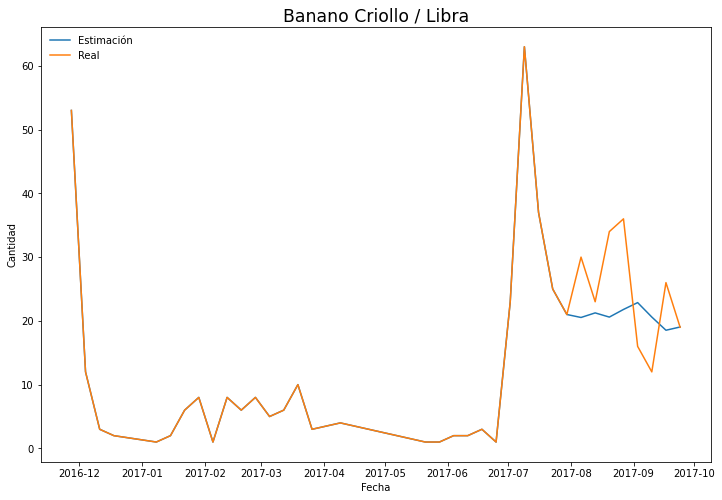

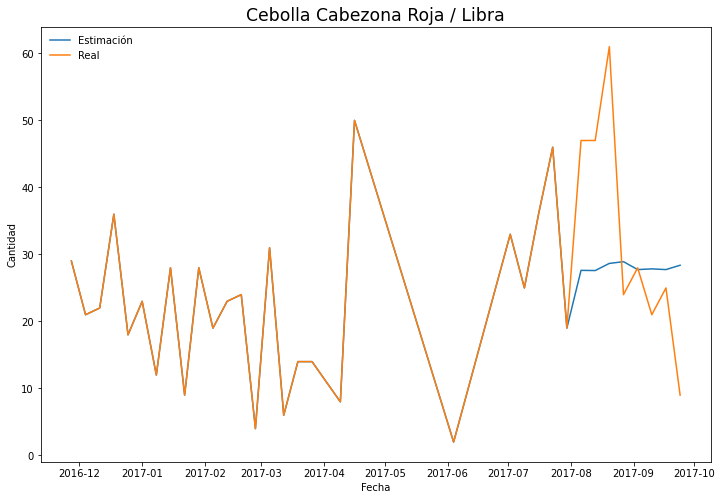

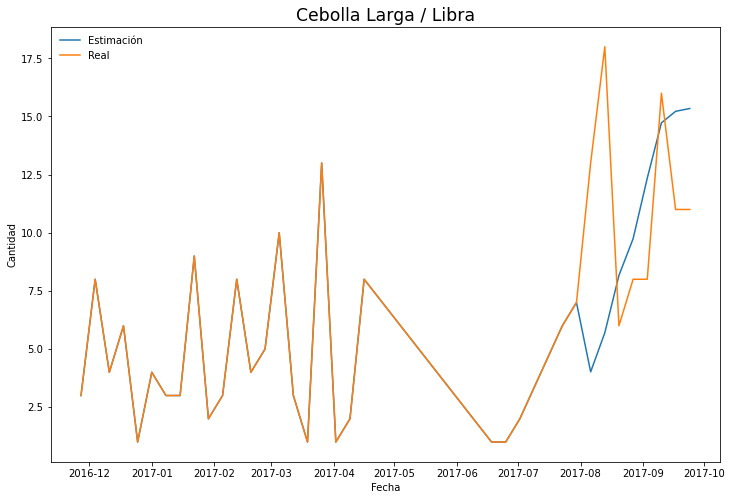

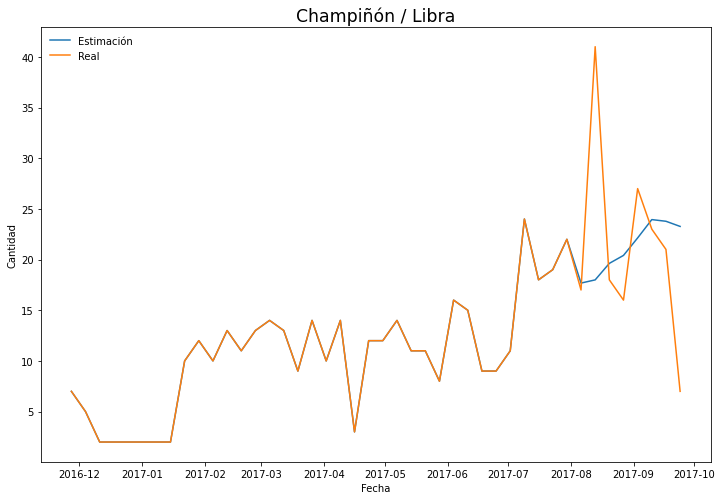

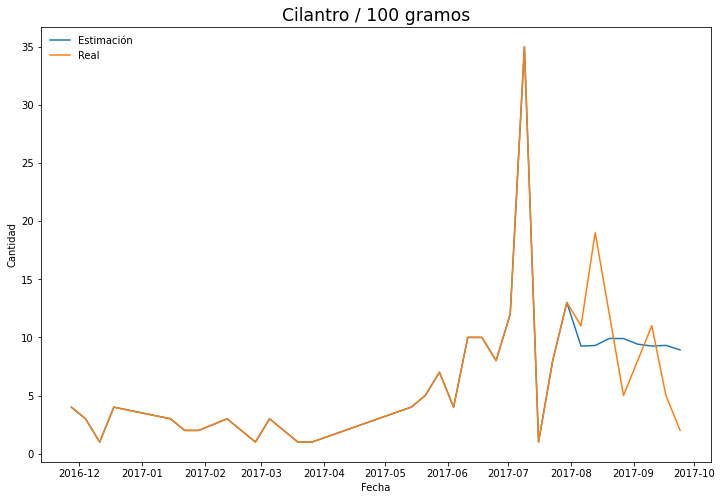

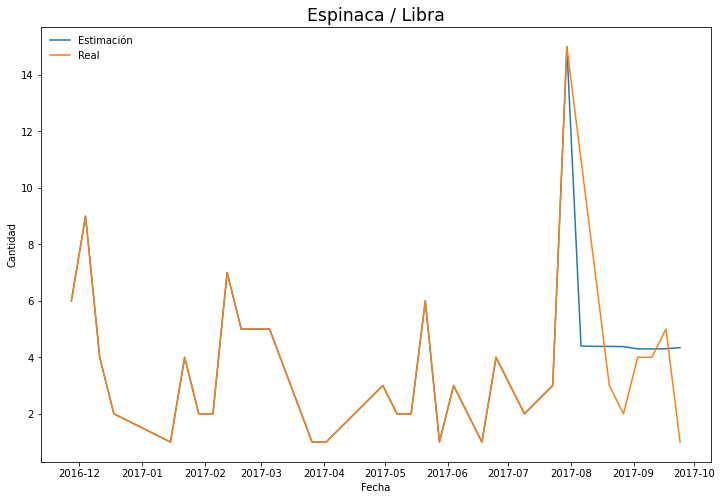

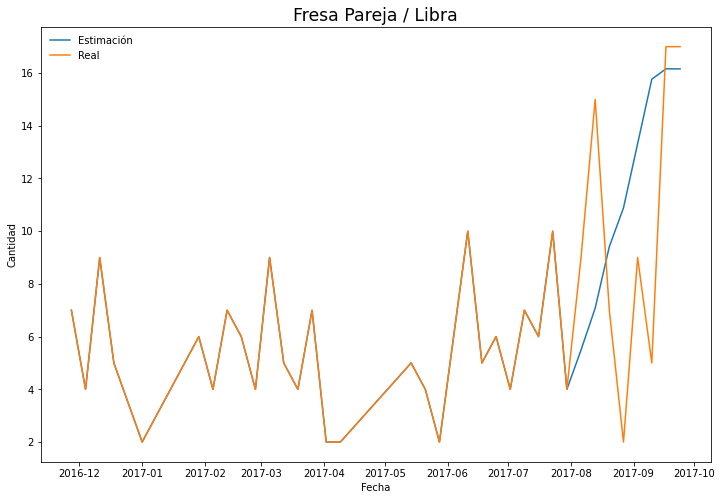

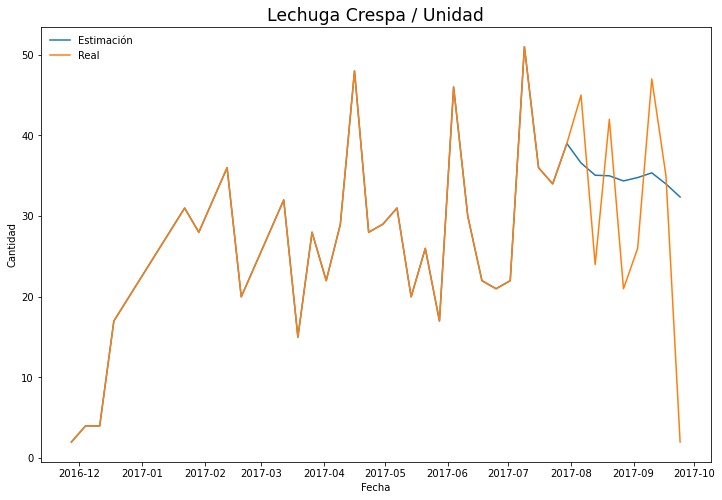

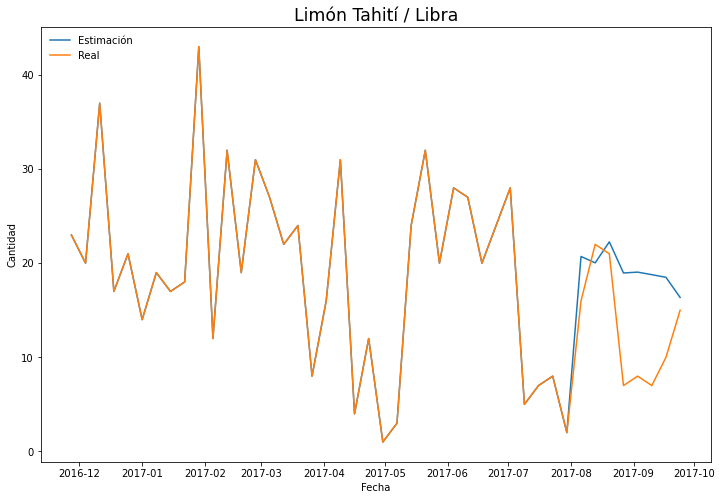

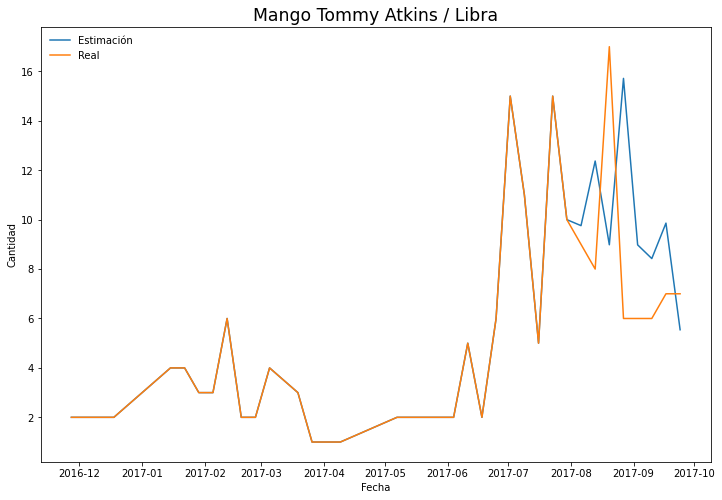

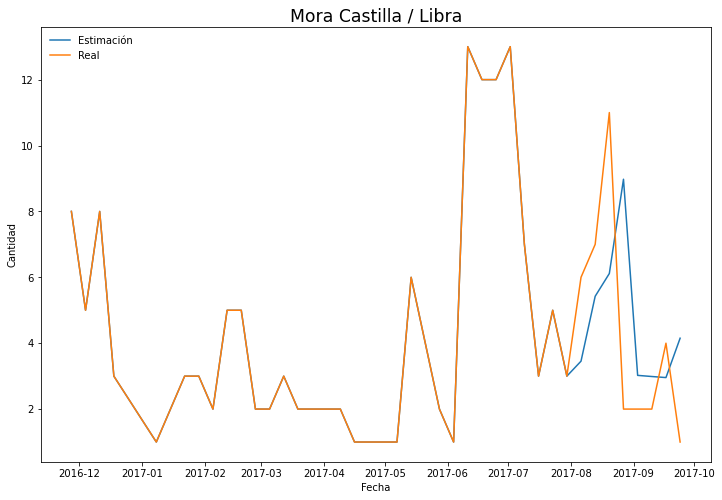

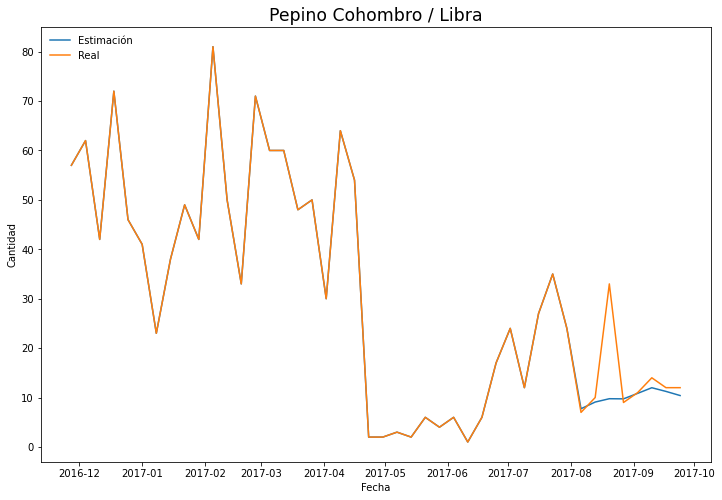

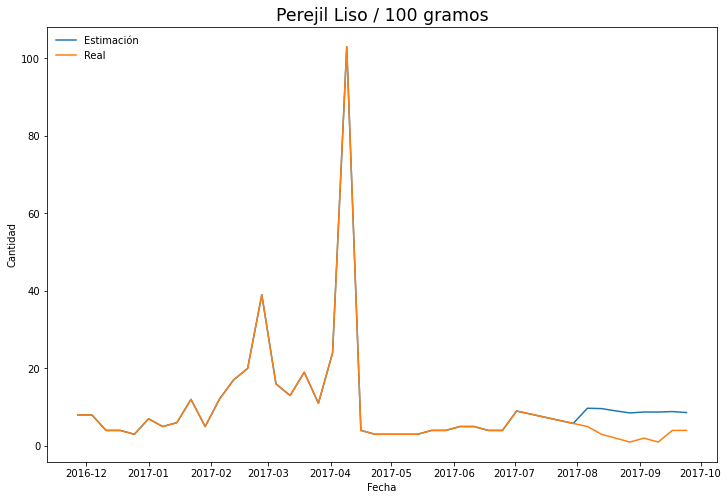

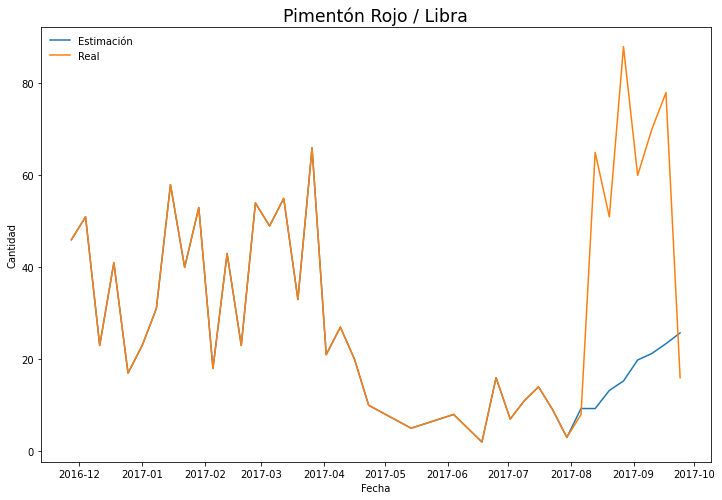

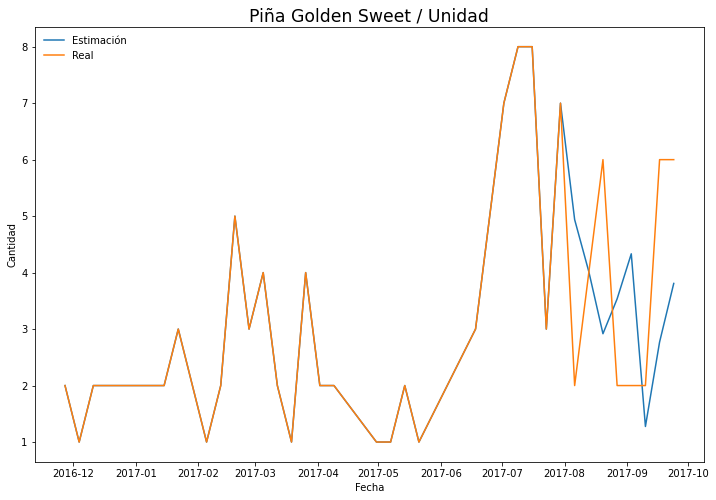

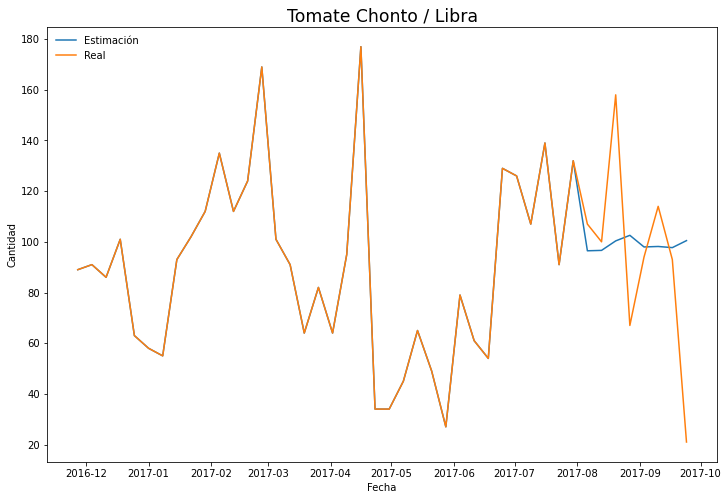

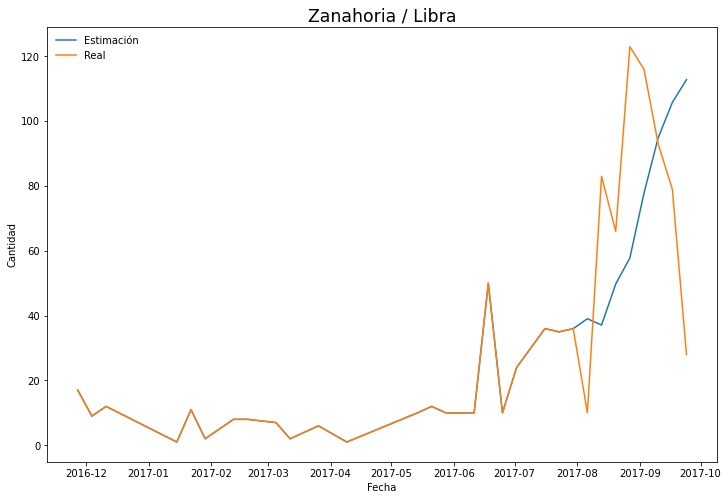

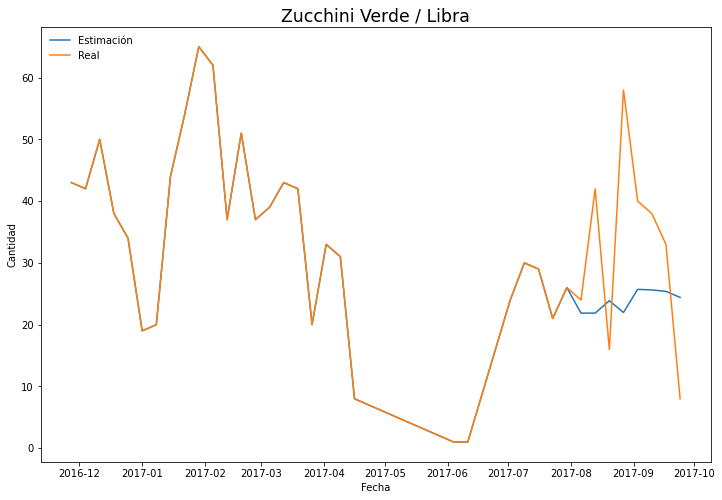

In [346]:
 for i in range(df_02.shape[1]):
    plt.figure(figsize=(12,8))
    plt.title(df_02.columns[i], fontsize='xx-large')
    plt.plot(Best_Pred_00.iloc[:,i], label='Estimación')
    plt.plot(df_02.iloc[:,i], label='Real')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.legend(loc='upper left', frameon=False)
    plt.show()

## Forecast

Finalmente se presentan las predicciones 4 pasos adelantes que corresponden a 1 mes de de demanda de cada uno de los 18 productos seleccionados.

In [307]:
def forecast_ARIMA(df,periodos): 
    #Producto=[]
    #RMSE=[]
    Predicciones_series=pd.DataFrame()
    
    for i in range(df.shape[1]):
        
        predictions = list()
        #train, test = pd.DataFrame(df_02.iloc[:n-8,i]), pd.DataFrame(df_02.iloc[n-8:,i])
        history = df_02.iloc[:,i].copy()
    
        
        m = auto_arima(history, error_action='ignore', seasonal=True, m=4)
        output = m.predict(periodos)
        yhat = output.reshape((1,periodos))[0]
        #predictions.append(yhat)
        #obs = pd.DataFrame(test.iloc[t]).transpose()
        #history = pd.concat([history, pd.DataFrame(yhat)],axis=0)
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({i:yhat})],axis=1)
        #error = mean_squared_error(test, predictions)**0.5
        
        #Producto.append(i)
        #RMSE.append(error)
    
    return Predicciones_series


In [308]:
F_ARIMA = forecast_ARIMA(df_02,4)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\mod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\mod

In [309]:
def forecast_prophet(df,period): 
    #Producto=[]
    #RMSE=[]
    Predicciones_series=pd.DataFrame()
    for i in range(df.shape[1]):
        
        predictions = list()
        data_pf = pd.DataFrame({'ds': df.index[:], 'y': df.iloc[:,i]})
        train, test = pd.DataFrame(data_pf.iloc[:n-8,:]), pd.DataFrame(data_pf.iloc[n-8:,:])
        history = train.copy()
    

        m = Prophet()
        m.fit(history);
        future = m.make_future_dataframe(periods=period, freq='w')
        forecast = m.predict(future)
        yhat = forecast[['yhat']][-period:].values.reshape(1,period)[0]
        #predictions.append(yhat)
        #obs = pd.DataFrame(Test[['ds','y']].iloc[t])
        #history = pd.concat([history, obs.transpose()],axis=0)
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({i:yhat})],axis=1)
        #error = mean_squared_error(test[["y"]], predictions)**0.5
        
        #Producto.append(i)
        #RMSE.append(error)
    
    return Predicciones_series

In [310]:
F_prophet = forecast_prophet(df_02, 4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_s

In [312]:
def forecast_LSTM(df, periodos): 
    Predicciones_series=pd.DataFrame()
    for k in range(df.shape[1]):
        
        data_LSTM = pd.DataFrame(df.iloc[:,k])
        data_LSTM.head()
        Y = data_LSTM
        size = len(Y)

        train_Y = pd.DataFrame(Y[0:size])
        
        scaler = MinMaxScaler()
        scaler.fit(Y)
        scaled_train_data = scaler.transform(train_Y)
        
        n_input = 16
        n_features= 1
        generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
        
        initnorm = RandomNormal(mean=0.0, stddev=0.05, seed=1)

        lstm_model = Sequential()
        lstm_model.add(LSTM(10, kernel_initializer=initnorm, input_shape=(n_input, n_features)))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')

        lstm_model.fit_generator(generator,epochs=20, verbose=0)
        
        lstm_predictions_scaled = list()
        
        batch = scaled_train_data[-n_input:]
        current_batch = batch.reshape((1, n_input, n_features))
        
        for i in range(periodos):   
            lstm_pred = lstm_model.predict(current_batch)[0]
            lstm_predictions_scaled.append(lstm_pred) 
            current_batch = np.append(current_batch[:,1:,:],[[lstm_predictions_scaled[0]]],axis=1)
        
        lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)   
        
        Predicciones_series=pd.concat([Predicciones_series,pd.DataFrame({k:lstm_predictions.reshape((1,periodos))[0]})],axis=1)
        
        
   
    return Predicciones_series

In [311]:
F_LSTM = forecast_LSTM(df_02, 4)

In [313]:
def forecast_LSTM_Multi(df, periodos): 

    Y = df_02.values
    size = len(Y)

    train_Y = pd.DataFrame(Y[0:size])

    scaler = MinMaxScaler()
    scaler.fit(Y)
    scaled_train_data = scaler.transform(train_Y)
    
    n_features = train_Y.shape[1]
    n_input = 18
    generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=8)
    
    model = Sequential()
    model.add(LSTM(32, activation='softmax', input_shape=(n_input, n_features)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(18))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(generator, epochs=80, batch_size=12, verbose=0)
    
    lstm_predictions_scaled = list()

    batch = scaled_train_data[-n_input:]
    current_batch = batch.reshape((1, n_input, n_features))

    for i in range(periodos):   
        lstm_pred = model.predict(current_batch)[0]
        lstm_predictions_scaled.append(lstm_pred) 
        current_batch = np.append(current_batch[:,1:,:],[[lstm_predictions_scaled[0]]],axis=1)
    
    lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
    
    Predicciones_LSTM_Multi = pd.DataFrame(lstm_predictions)
        
        
   
    return Predicciones_LSTM_Multi

In [314]:
F_LSTM_MULTI = forecast_LSTM_Multi(df_02, 4)

## Plot Forecast

In [339]:
Modelos = {'RMSE_ARIMA':F_ARIMA,
          'RMSE_prophet':F_prophet,
          'RMSE_LSTM':F_LSTM,
          'RMSE_LSTM_Multi':F_LSTM_MULTI}

Best_Forecast = pd.DataFrame()

for i in range(Resumen.shape[0]):
    Pred = Modelos[Resumen.iloc[i,6]]
    Best_Forecast=pd.concat([Best_Forecast,pd.DataFrame({i:Pred.iloc[:,i]})],axis=1)
    

Best_Forecast.columns = df_02.columns

Best_Forecast = Best_Forecast.set_index(pd.date_range(df_02.index[-1], periods=5, freq='W')[1:])

In [340]:
Best_Forecast

Nombre_producto  Banano Criollo / Libra  Cebolla Cabezona Roja / Libra  \
2017-10-01                     21.76677                       24.57318   
2017-10-08                     21.62495                       26.71364   
2017-10-15                     21.50881                       26.74461   
2017-10-22                     21.44834                       26.70628   

Nombre_producto  Cebolla Larga / Libra  Champiñón / Libra  \
2017-10-01                     4.01709           17.68102   
2017-10-08                     3.99111           18.06452   
2017-10-15                     3.96514           18.44801   
2017-10-22                     3.93916           18.83151   

Nombre_producto  Cilantro / 100 gramos  Espinaca / Libra  \
2017-10-01                     8.51338           3.48789   
2017-10-08                     8.44682           3.71222   
2017-10-15                     8.39654           3.71678   
2017-10-22                     8.37641           3.71543   

Nombre_producto  Fresa Pareja / Libra  Lechuga Crespa / Unidad  \
2017-10-01                    5.49083                 36.58859   
2017-10-08                    5.51524                 37.14377   
2017-10-15                    5.53965                 37.69895   
2017-10-22                    5.56406                 38.25412   

Nombre_producto  Limón Tahití / Libra  Mango Tommy Atkins / Libra  \
2017-10-01                   17.47817                     5.96127   
2017-10-08                   18.05971                     5.79803   
2017-10-15                   18.19617                     5.27337   
2017-10-22                   18.22820                     6.51571   

Nombre_producto  Mora Castilla / Libra  Pepino Cohombro / Libra  \
2017-10-01                     2.33622                  7.73699   
2017-10-08                     3.11461                  6.29275   
2017-10-15                     3.56805                  4.84852   
2017-10-22                     3.83220                  3.40428   

Nombre_producto  Perejil Liso / 100 gramos  Pimentón Rojo / Libra  \
2017-10-01                         5.12605               34.56148   
2017-10-08                         4.54786               33.25634   
2017-10-15                         4.55498               32.11620   
2017-10-22                         4.60622               31.31097   

Nombre_producto  Piña Golden Sweet / Unidad  Tomate Chonto / Libra  \
2017-10-01                          6.52314               76.47001   
2017-10-08                          5.51548               79.82004   
2017-10-15                          4.22163               79.89801   
2017-10-22                          4.39332               79.91240   

Nombre_producto  Zanahoria / Libra  Zucchini Verde / Libra  
2017-10-01                87.00298                25.54297  
2017-10-08                95.21046                23.24251  
2017-10-15                99.01693                21.25328  
2017-10-22               104.56244                19.90836

In [341]:
Best_Forecast_00 = pd.concat([df_02.iloc[:df_02.shape[0],],Best_Forecast],axis=0)

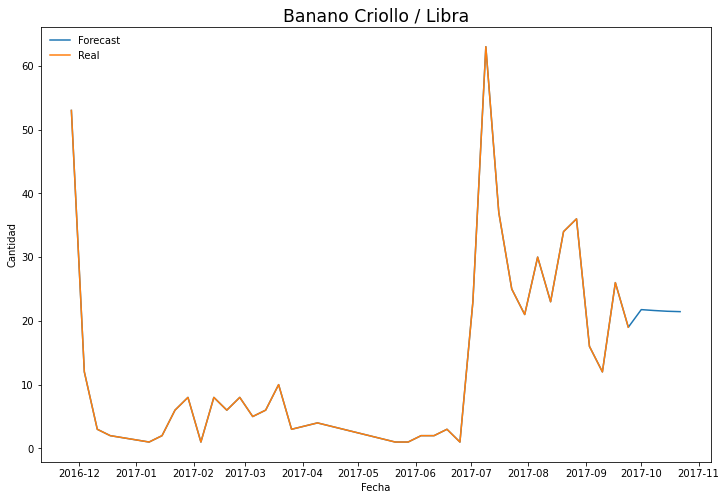

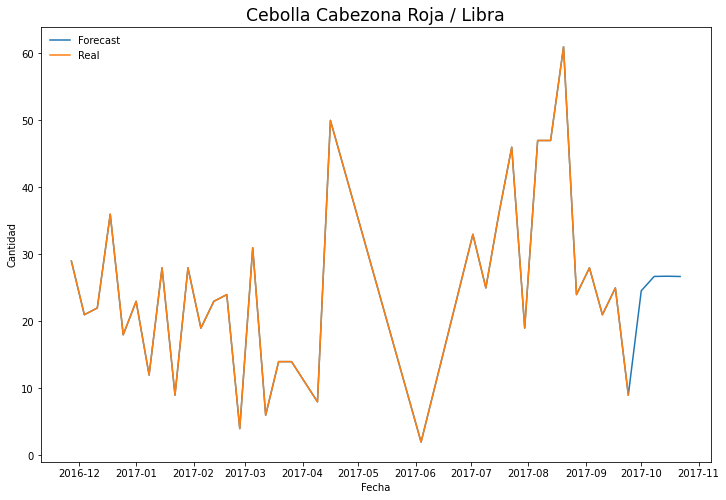

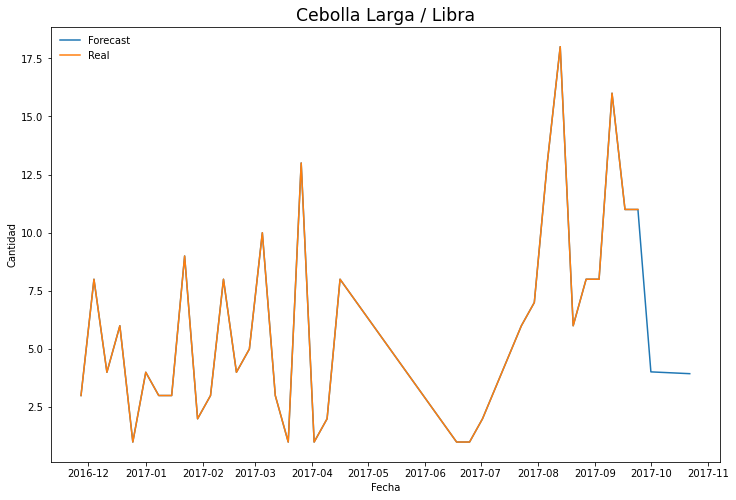

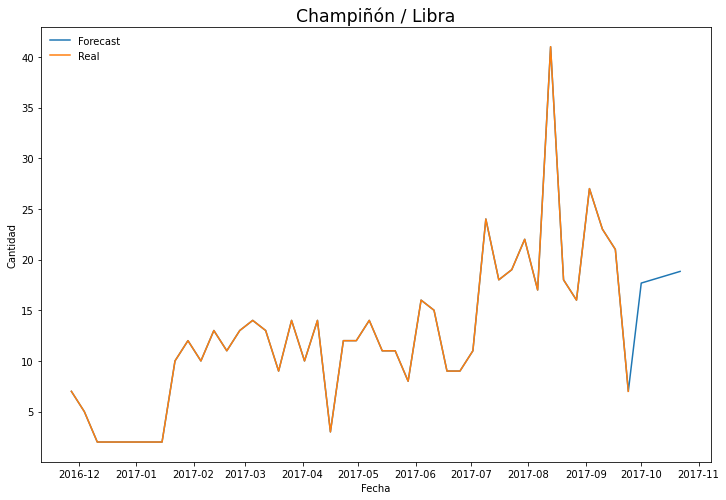

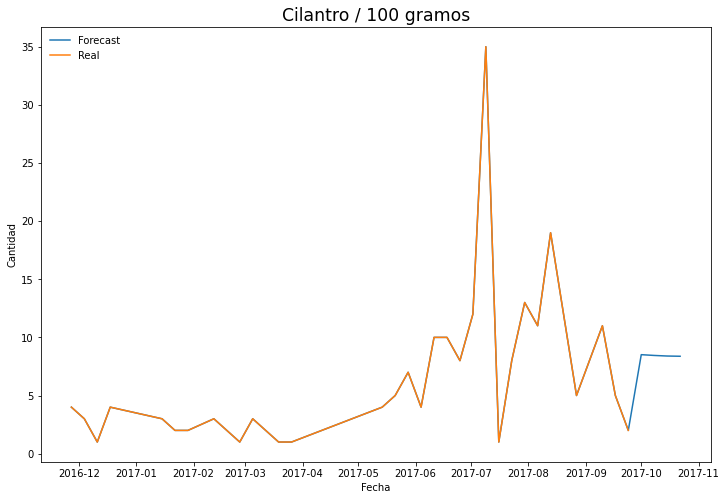

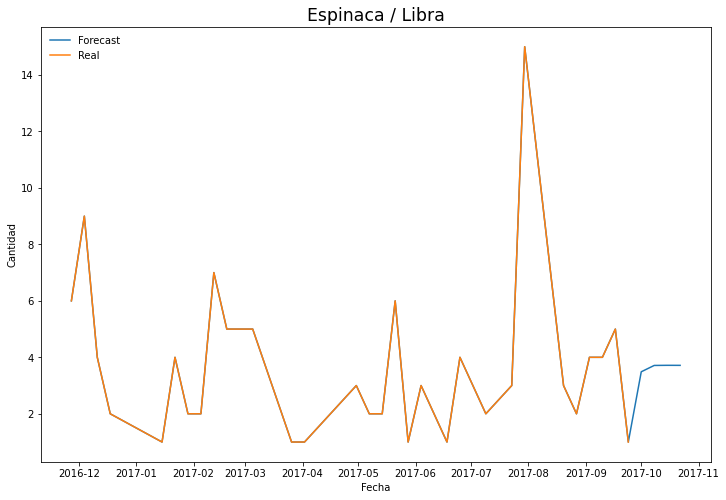

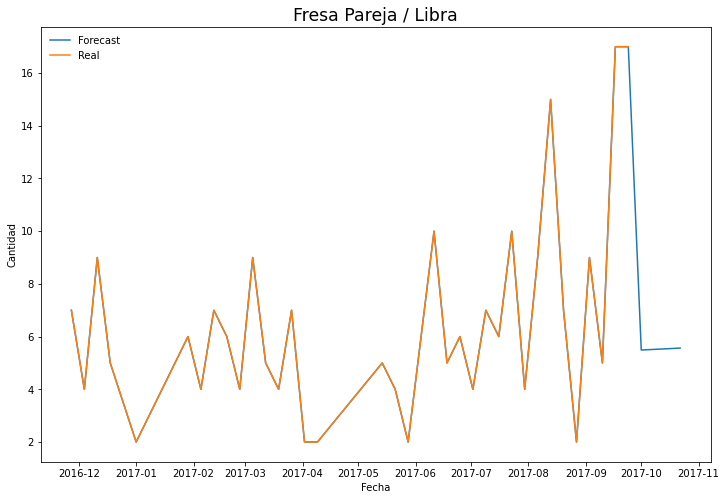

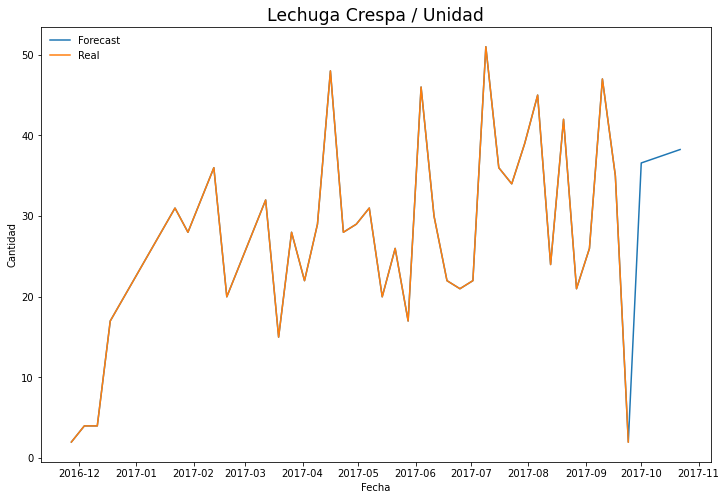

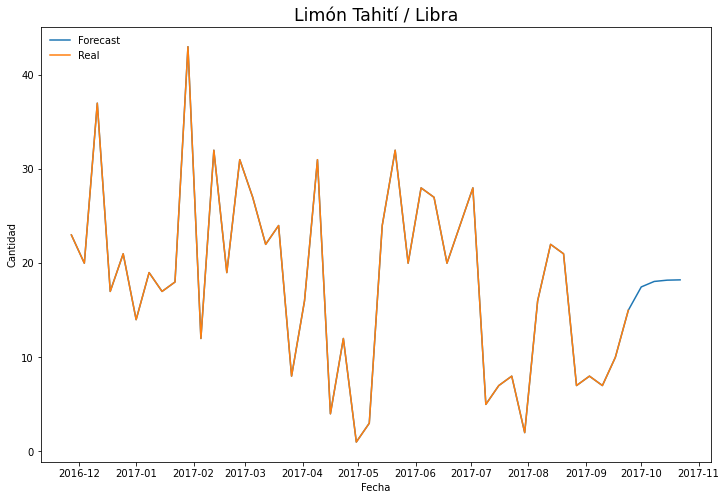

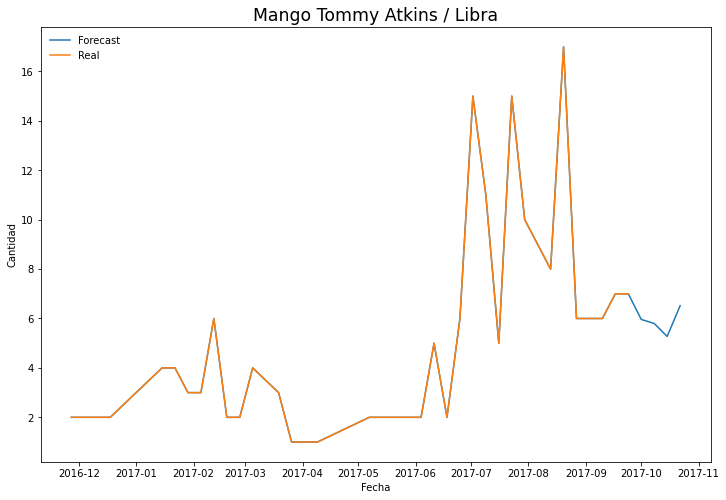

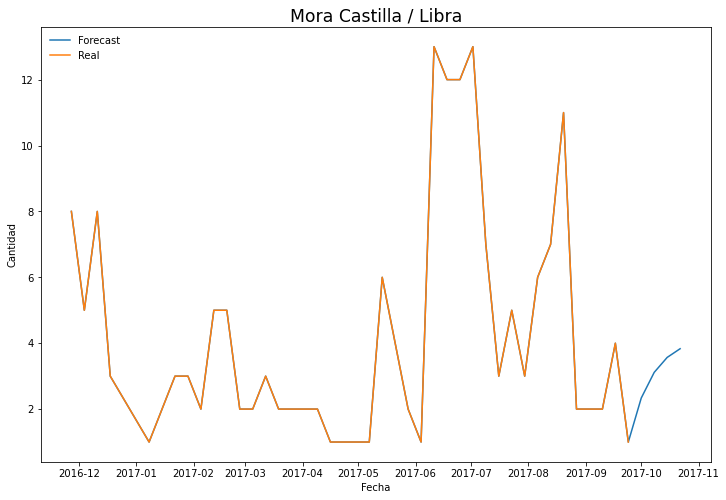

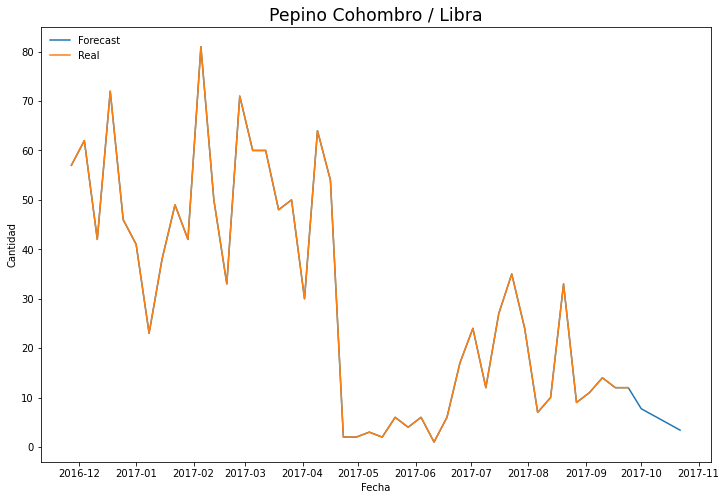

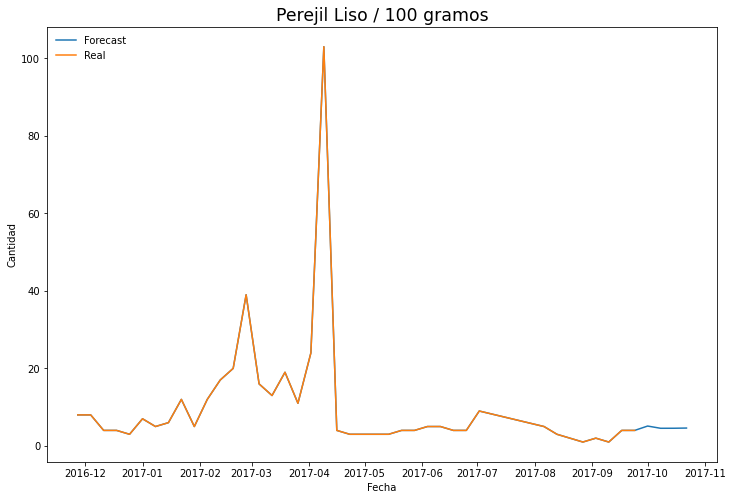

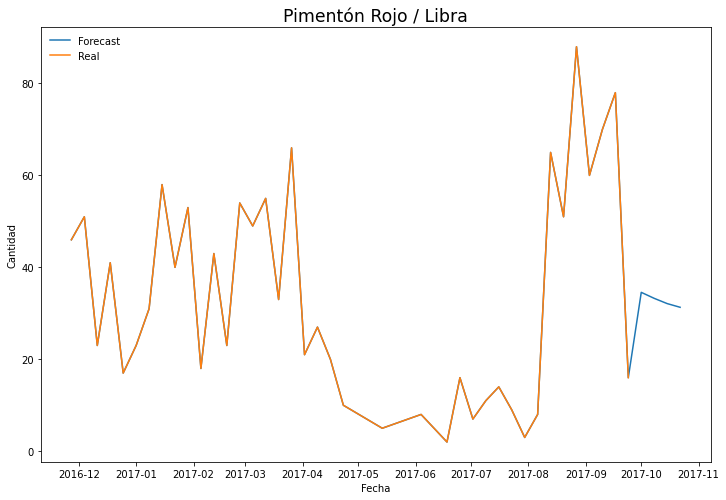

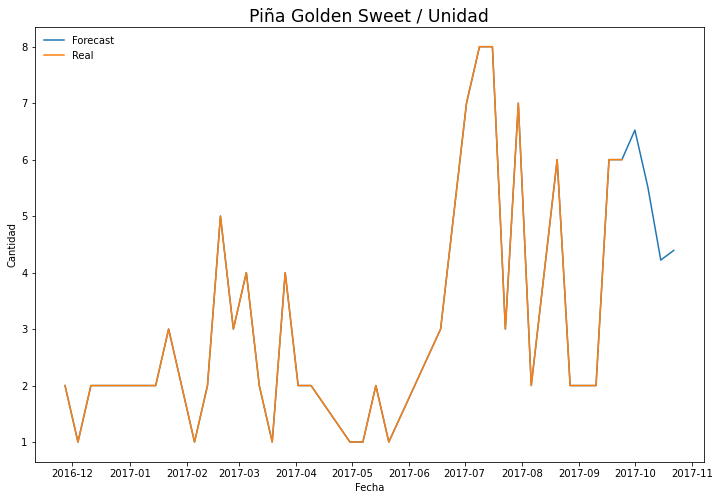

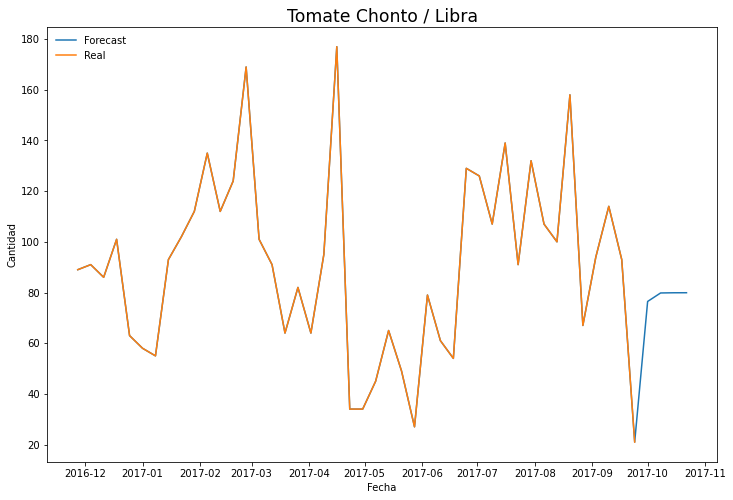

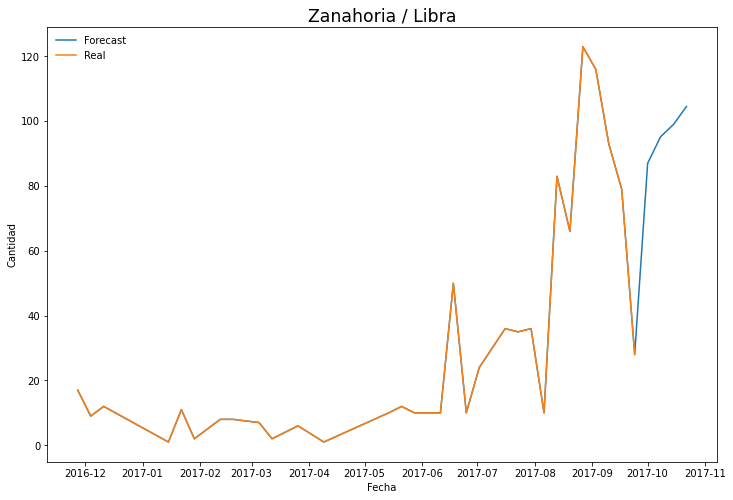

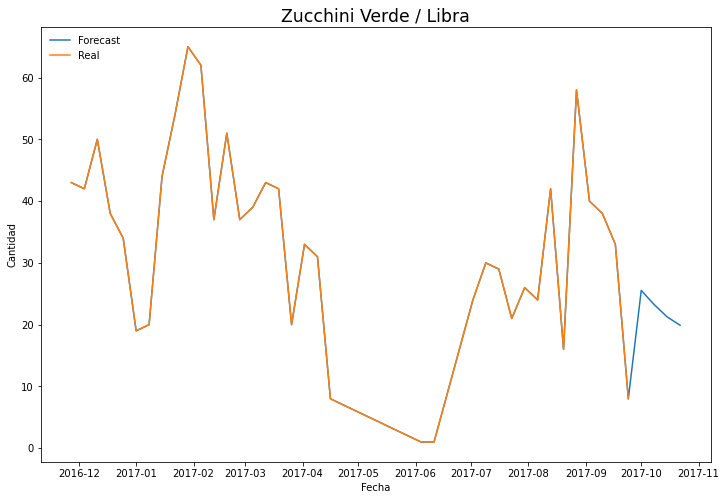

In [345]:
 for i in range(df_02.shape[1]):
    plt.figure(figsize=(12,8))
    plt.title(df_02.columns[i], fontsize='xx-large')
    plt.plot(Best_Forecast_00.iloc[:,i], label='Forecast')
    plt.plot(df_02.iloc[:,i], label='Real')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.legend(loc='upper left', frameon=False)
    plt.show()

In [347]:
Best_Forecast_00

Nombre_producto  Banano Criollo / Libra  Cebolla Cabezona Roja / Libra  \
2016-11-27                     53.00000                       29.00000   
2016-12-04                     12.00000                       21.00000   
2016-12-11                      3.00000                       22.00000   
2016-12-18                      2.00000                       36.00000   
2016-12-25                      1.66667                       18.00000   
2017-01-01                      1.33333                       23.00000   
2017-01-08                      1.00000                       12.00000   
2017-01-15                      2.00000                       28.00000   
2017-01-22                      6.00000                        9.00000   
2017-01-29                      8.00000                       28.00000   
2017-02-05                      1.00000                       19.00000   
2017-02-12                      8.00000                       23.00000   
2017-02-19                      6.00000                       24.00000   
2017-02-26                      8.00000                        4.00000   
2017-03-05                      5.00000                       31.00000   
2017-03-12                      6.00000                        6.00000   
2017-03-19                     10.00000                       14.00000   
2017-03-26                      3.00000                       14.00000   
2017-04-02                      3.50000                       11.00000   
2017-04-09                      4.00000                        8.00000   
2017-04-16                      3.50000                       50.00000   
2017-04-23                      3.00000                       43.14286   
2017-04-30                      2.50000                       36.28571   
2017-05-07                      2.00000                       29.42857   
2017-05-14                      1.50000                       22.57143   
2017-05-21                      1.00000                       15.71429   
2017-05-28                      1.00000                        8.85714   
2017-06-04                      2.00000                        2.00000   
2017-06-11                      2.00000                        9.75000   
2017-06-18                      3.00000                       17.50000   
2017-06-25                      1.00000                       25.25000   
2017-07-02                     23.00000                       33.00000   
2017-07-09                     63.00000                       25.00000   
2017-07-16                     37.00000                       36.00000   
2017-07-23                     25.00000                       46.00000   
2017-07-30                     21.00000                       19.00000   
2017-08-06                     30.00000                       47.00000   
2017-08-13                     23.00000                       47.00000   
2017-08-20                     34.00000                       61.00000   
2017-08-27                     36.00000                       24.00000   
2017-09-03                     16.00000                       28.00000   
2017-09-10                     12.00000                       21.00000   
2017-09-17                     26.00000                       25.00000   
2017-09-24                     19.00000                        9.00000   
2017-10-01                     21.76677                       24.57318   
2017-10-08                     21.62495                       26.71364   
2017-10-15                     21.50881                       26.74461   
2017-10-22                     21.44834                       26.70628   

Nombre_producto  Cebolla Larga / Libra  Champiñón / Libra  \
2016-11-27                     3.00000            7.00000   
2016-12-04                     8.00000            5.00000   
2016-12-11                     4.00000            2.00000   
2016-12-18                     6.00000            2.00000   
2016-12-25                     1.00000            2.00000   
2017-01